# Customer Analytics: Ecommerce Customer Churn

#### Dibuat oleh : Adha Ozy Prima Dewangga

## Business Problem 

<h3><b>Business Context</b></h3>
<p>E-commerce, atau sering disebut sebagai perdagangan elektronik, merujuk pada aktivitas jual beli produk atau jasa yang dilakukan secara daring atau online melalui internet. E-commerce melibatkan transaksi bisnis antara penjual dan pembeli yang dilakukan secara elektronik, tanpa adanya interaksi fisik langsung antara penjual dan pembeli.Ecommerce Customer Churn adalah istilah yang digunakan untuk menggambarkan proses atau keadaan di mana pelanggan dalam bisnis e-commerce atau toko online berhenti menggunakan layanan atau berhenti melakukan pembelian dari toko tersebut. Dalam kata lain, customer churn terjadi ketika pelanggan yang sebelumnya aktif dalam berbelanja di toko online, kemudian berhenti melakukan transaksi atau tidak lagi berinteraksi dengan toko tersebut. Oleh sebab itu, perusahaan membutuhkan strategi bisnis yang tepat guna mencegah customer churn.</p>
<p>Target :</p>
<p>0 : Pelanggan Tidak Churn</p>
<p>1 : Pelanggan Churn</p>

<h3><b>Problem Statement :</b></h3>
<p>Proses untuk menangani pelanggan yang akan melakukan churn akan membutuhkan waktu dan sumber daya yang tidak sedikit jika perusahaan akan mengarahkan semuanya pada seluruh pelanggan yang ada tanpa ada penyaringan yang tepat. Perusahaan ingin menerapkan program loyalitas yang menarik, seperti poin hadiah, diskon eksklusif, atau keanggotaan khusus, dapat menjadi cara efektif untuk mendorong pelanggan untuk tetap berada di dalam ekosistem toko online dan melakukan pembelian lagi. Program loyalitas yang dirancang dengan baik dapat memberikan insentif bagi pelanggan untuk tetap setia dan berbelanja lebih sering.</p>
<p>Jika program loyalitas diberikan kepada semua pelanggan, dikhawatirkan anggaran untuk biaya program loyalitas sia-sia jika pelanggan tersebut memang tidak berniat untuk churn</p>


<h3><b>Goals :</b></h3>

<p>Berdasarakan permasalahan yang telah terlihat, perusahaan ingin memiliki kemampuan untuk membaca kemungkinan untuk seorangn pelanggan untuk churn, sehingga pemberian program loyalitas tertuju pada pelanggan yang ingin churn saja.</p>
<p>Selain itu, perusahaan ingin mengetahui apa yang menjadi faktor-faktor yang membuat seorang pelanggan ingin churn, faktor-faktor tersebut akan digunakan untuk menentukan strategi atau langkah yang tepat untuk perusahaan kedepanya.</p>

<h3><b>Analytic Approach :</b></h3>
<p>Jadi yang akan kita lakukan adalah menganalisi data untuk menemukan pola yang membedakan pelanggan yang akan melakukan churn dan yang tidak</p>
<p>Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang pelanggan di E-Commerce akan churn atau tidak</p>

<h3><b>Metric Evaluation :</b></h3>


![alt text](https://github.com/Markenji/-Project-Capstone-Modul-3-Machine-Learning/blob/main/Picture/Metric%20Evaluation.png?raw=true)

<p>Type 1 error :  False Negatif <br> Konsekuensi: Pelanggan benar-benar churn, efek sampingnya perusahaan harus mencari pelanggan baru dengan cara iklan. </p>
<p>Type 2 error : False Positif <br> Konsekuensi: Perusahaan sia-sia memberikan biaya program loyalitas pada pelanggan yang tidak churn, efek sampingnya perusahaan kehilangan uang untuk promosi.</p>


<p>Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi pelanggan churn dari perusahaan E-Commerst tersebut, tetapi tanpa membuat kesalahan dalam pemberian program loyalitas di rencanakan perusahaan. Dikarenakan biaya iklan cenderung lebih mahal daripada biaya promosi diskon dalam jangka pendek. Di sisi lain, promosi diskon adalah metode pemasaran yang bisa lebih ekonomis karena hanya melibatkan pengurangan harga produk atau layanan. Jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan sesedikit mungkin prediksi false positive. Jadi nanti metric utama yang akan kita gunakan adalah roc_auc.</p>


## Data Understanding & Data Cleaning

### Library 

In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.impute import KNNImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import log_loss

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows',200)

### Data Understanding

<h4>E-commerce Customer Churn</h4>
<h4>Konteks</h4>
<p>Kumpulan data milik perusahaan E-niaga online terkemuka. Perusahaan ritel online (E-commerce) ingin mengetahui pelanggan yang akan melakukan churn, sehingga mereka dapat mendekati pelanggan untuk menawarkan beberapa promo.</p>
<h5><b>Fitur</b></h5>
<table>
  <tr>
    <th>Attribute</th>
    <th>Data Type</th>
    <th>Description</th>
  </tr>
  <tr>
    <th><b>Tenure</b></th>
    <td>Float</td>
    <td>Masa jabatan pelanggan di perusahaan.</td>
  </tr>
  <tr>
    <th><b>WarehouseToHome</b></th>
    <td>Float</td>
    <td>Jarak antara gudang ke rumah pelanggan.</td>
  </tr>
  <tr>
    <th><b>NumberOfDeviceRegistered</b></th>
    <td>Integer</td>
    <td>Jumlah total perangkat terdaftar pada pelanggan .</td>
  </tr>
  <tr>
    <th><b>PreferedOrderCat</b></th>
    <td>Text</td>
    <td>Kategori pesanan pilihan pelanggan pada bulan lalu.</td>
  </tr>
  <tr>
    <th><b>SatisfactionScore</b></th>
    <td>Integer</td>
    <td>Skor memuaskan pelanggan pada layanan.</td>
  </tr>
  <tr>
    <th><b>MaritalStatus</b></th>
    <td>Text</td>
    <td>Status perkawinan pelanggan.</td>
  </tr>
  <tr>
    <th><b>NumberOfAddress</b></th>
    <td>Integer</td>
    <td>Jumlah total yang ditambahkan pada pelanggan tertentu.</td>
  </tr>
  <tr>
    <th><b>Complaint</b></th>
    <td>Integer</td>
    <td>Setiap keluhan telah diajukan pada bulan lalu.</td>
  </tr>
  <tr>
    <th><b>DaySinceLastOrder</b></th>
    <td>Float</td>
    <td>Hari sejak pemesanan terakhir oleh pelanggan.</td>
  </tr>
  <tr>
    <th><b>CashbackAmount</b></th>
    <td>Float</td>
    <td>Rata-rata cashback pada bulan lalu.</td>
  </tr>
  <tr>
    <th><b>Churn</b></th>
    <td>Boolean</td>
    <td>Bendera churn.</td>
  </tr>
</table>

<p>Sumber Data : <a href="https://drive.google.com/drive/folders/1PITb78NtK9Ra6wOkQdXCIgItZkj29Ves">Klik disini</a></p>
<p>Data Awal Terdiri dari : 3941 baris × 11 kolom</p>

### Data

In [2]:
# Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/Markenji/-Project-Capstone-Modul-3-Machine-Learning/main/data_ecommerce_customer_churn.csv')
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


In [3]:
df[df['Churn']==1]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
7,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
12,1.0,7.0,4,Mobile Phone,3,Divorced,5,0,3.0,154.09,1
13,1.0,7.0,5,Fashion,3,Divorced,7,0,NaN,231.09,1
17,8.0,22.0,4,Fashion,2,Divorced,3,0,6.0,204.78,1
19,0.0,18.0,1,Mobile,4,Single,2,0,0.0,127.16,1
...,...,...,...,...,...,...,...,...,...,...,...
3905,15.0,11.0,3,Fashion,4,Single,10,1,7.0,184.46,1
3907,2.0,NaN,3,Mobile,5,Divorced,8,1,2.0,124.04,1
3916,0.0,24.0,3,Mobile,1,Single,2,0,0.0,126.93,1
3925,NaN,8.0,4,Mobile,3,Single,2,0,2.0,120.44,1


In [4]:
# Melihat tipe data setiap masing-masing kolum dan banyaknya kolum pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [5]:
# Melakukan Describe untuk melihat hal unik.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,3747.0,10.081398,8.498864,0.0,2.0,9.00,16.00,61.00
WarehouseToHome,3772.0,15.650583,8.452301,5.0,9.0,14.00,21.00,127.00
NumberOfDeviceRegistered,3941.0,3.679269,1.013938,1.0,3.0,4.00,4.00,6.00
SatisfactionScore,3941.0,3.088302,1.381832,1.0,2.0,3.00,4.00,5.00
NumberOfAddress,3941.0,4.237757,2.626699,1.0,2.0,3.00,6.00,22.00
Complain,3941.0,0.282416,0.450232,0.0,0.0,0.00,1.00,1.00
DaySinceLastOrder,3728.0,4.531652,3.667648,0.0,2.0,3.00,7.00,46.00
CashbackAmount,3941.0,176.707419,48.791784,0.0,145.7,163.34,195.25,324.99
Churn,3941.0,0.171023,0.376576,0.0,0.0,0.00,0.00,1.00


### Data Cleaning

In [6]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,194,4.92,36,"[22.0, 19.0]"
1,WarehouseToHome,float64,169,4.29,33,"[14.0, 16.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[3, 2]"
3,PreferedOrderCat,object,0,0.00,6,"[Mobile, Laptop & Accessory]"
4,SatisfactionScore,int64,0,0.00,5,"[1, 5]"
5,MaritalStatus,object,0,0.00,3,"[Divorced, Married]"
6,NumberOfAddress,int64,0,0.00,14,"[21, 8]"
7,Complain,int64,0,0.00,2,"[0, 1]"
8,DaySinceLastOrder,float64,213,5.40,22,"[0.0, 13.0]"
9,CashbackAmount,float64,0,0.00,2335,"[195.94, 194.49]"


#### Duplicated Data

In [7]:
# Check for Duplicates
df[df.duplicated()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
70,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1
194,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0
253,19.0,6.0,3,Fashion,5,Married,2,0,7.0,204.53,0
289,16.0,36.0,4,Laptop & Accessory,3,Married,4,0,3.0,170.56,0
...,...,...,...,...,...,...,...,...,...,...,...
3930,22.0,17.0,3,Laptop & Accessory,1,Single,4,0,4.0,145.07,0
3932,20.0,15.0,5,Laptop & Accessory,5,Married,10,1,8.0,171.15,0
3934,10.0,25.0,3,Laptop & Accessory,3,Married,4,0,2.0,157.68,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


#### Bar Plot

In [8]:
df.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

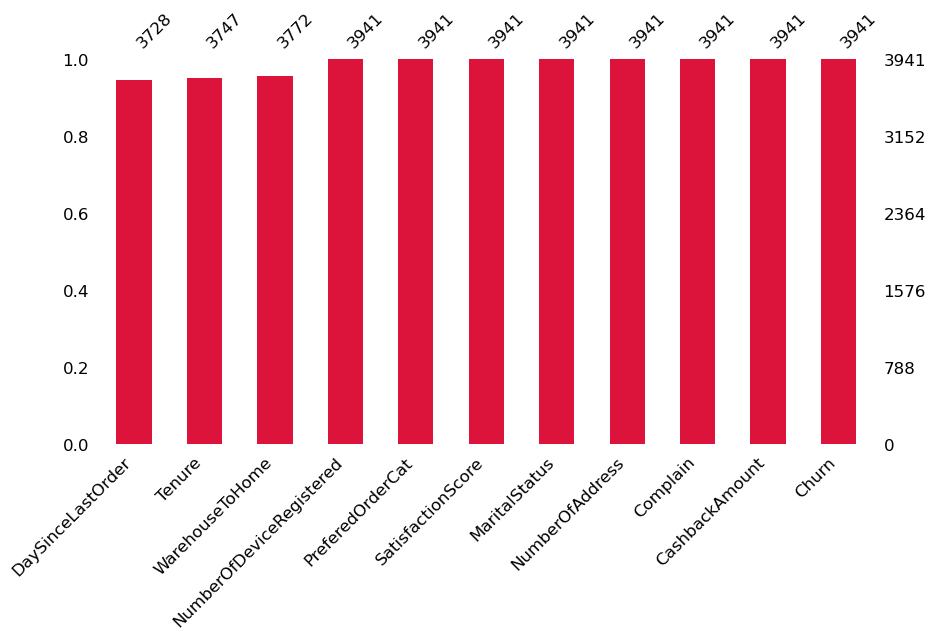

In [9]:
missingno.bar(df,color="Crimson", sort="ascending", figsize=(10,5), fontsize=12);

#### Matrix Plot

<Axes: >

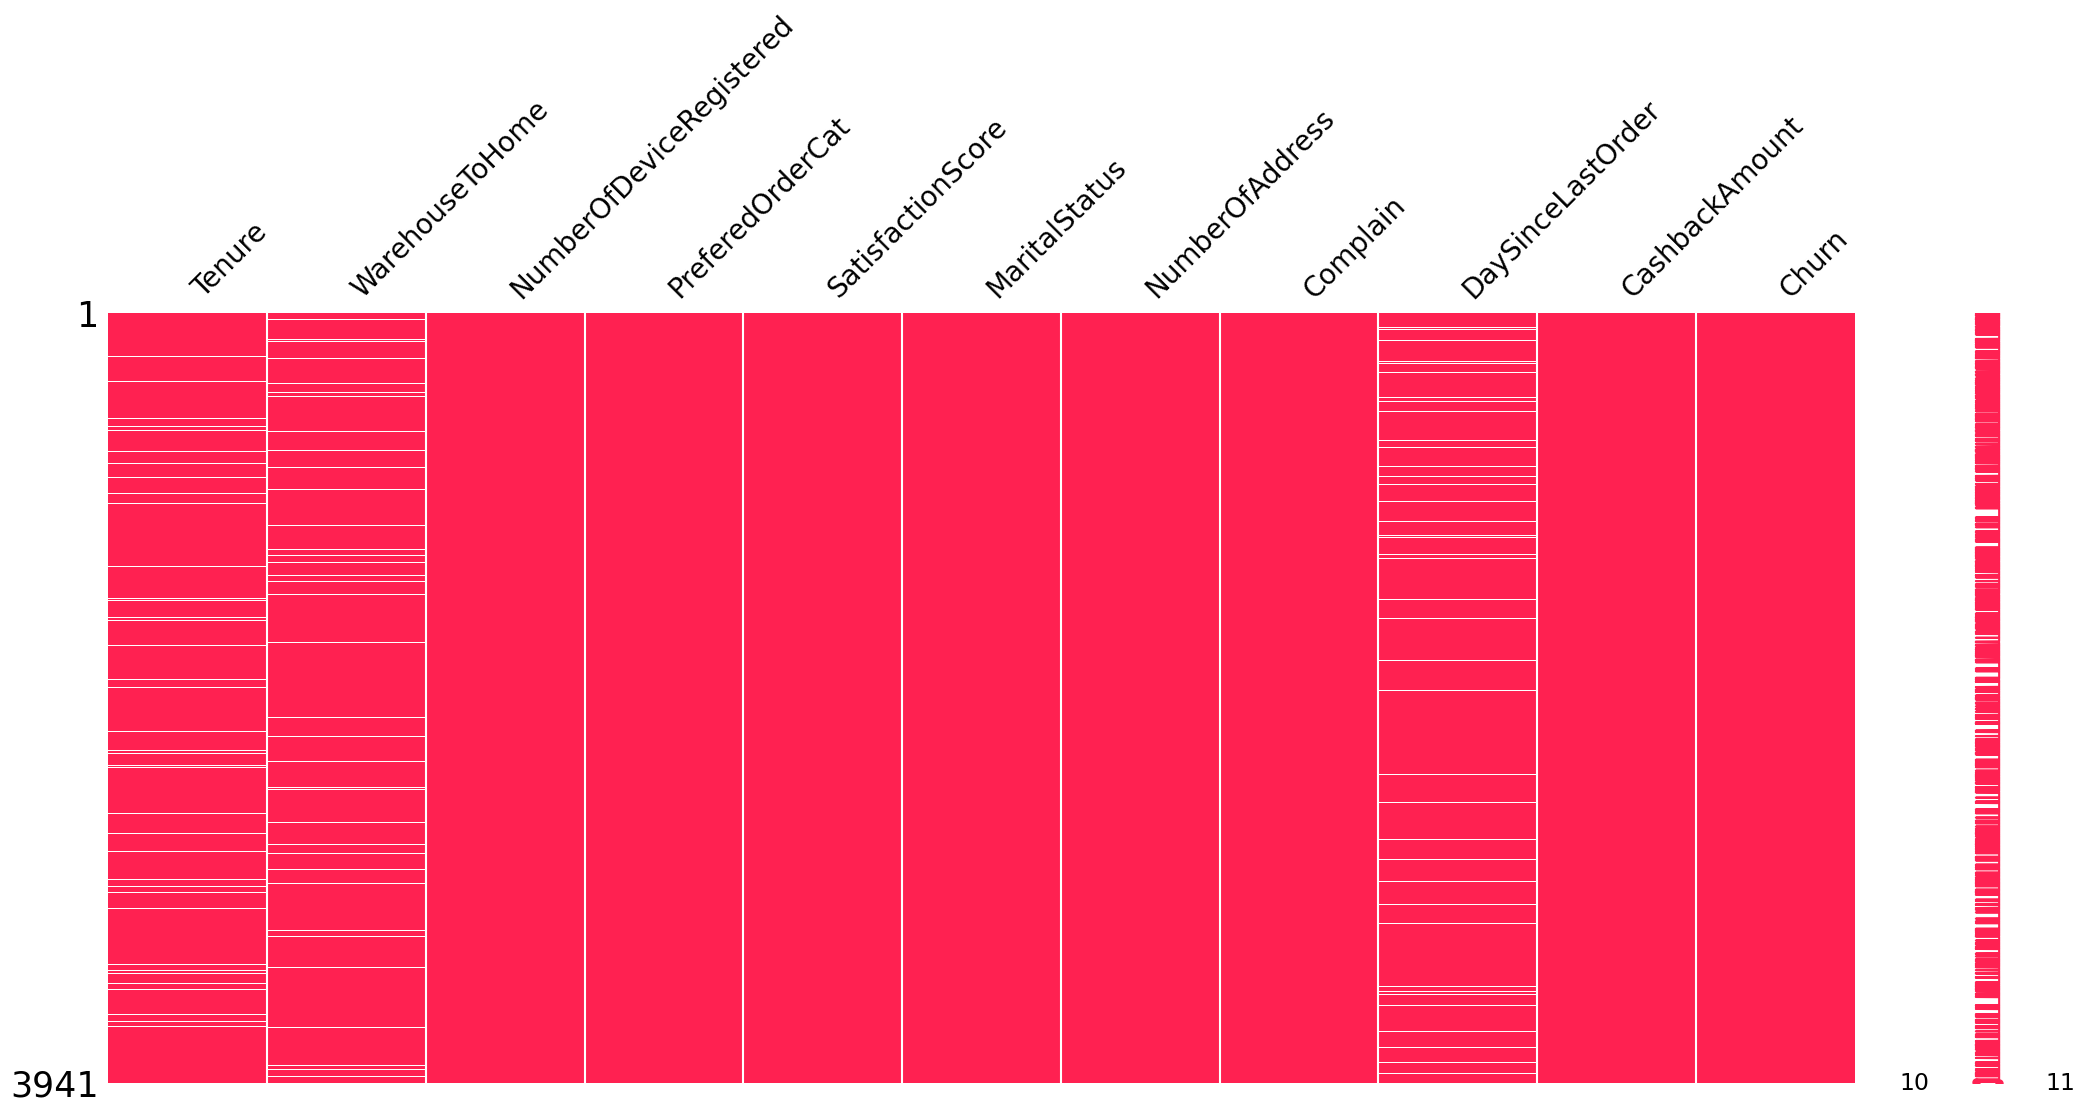

In [10]:

missingno.matrix(df,color=(1.0, 0.13, 0.32),fontsize=20)

#### Heatmap

Di bawah ini kita memplot Heatmap yang menunjukkan korelasi nulitas antara berbagai kolom yang memiliki data yang hilang pada dataset kita.

Korelasi nulitas berkisar dari -1 hingga 1.

- -1 - Korelasi Negatif yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada.
- 0 - Tidak ada korelasi yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain.
- 1 - Korelasi Positif yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada

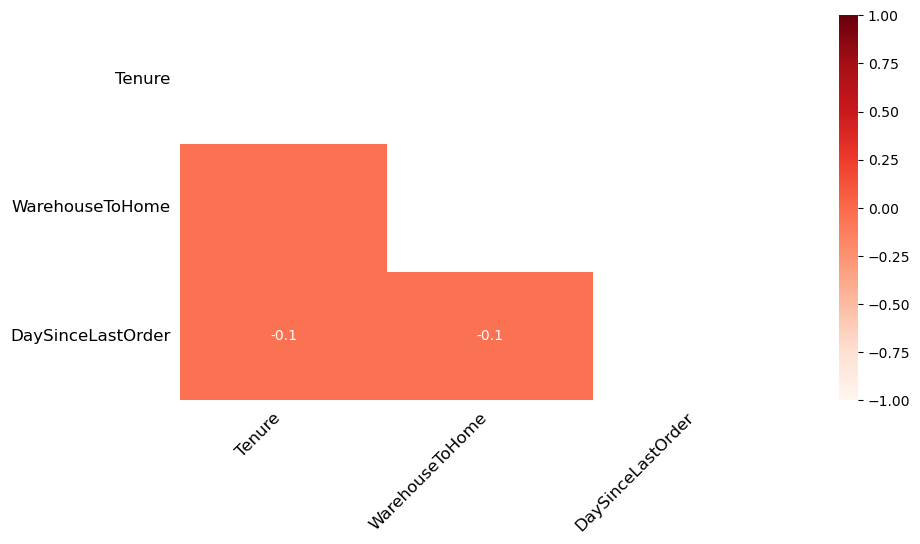

In [11]:
missingno.heatmap(df, cmap="Reds", figsize=(10,5), fontsize=12);

#### Dendogram

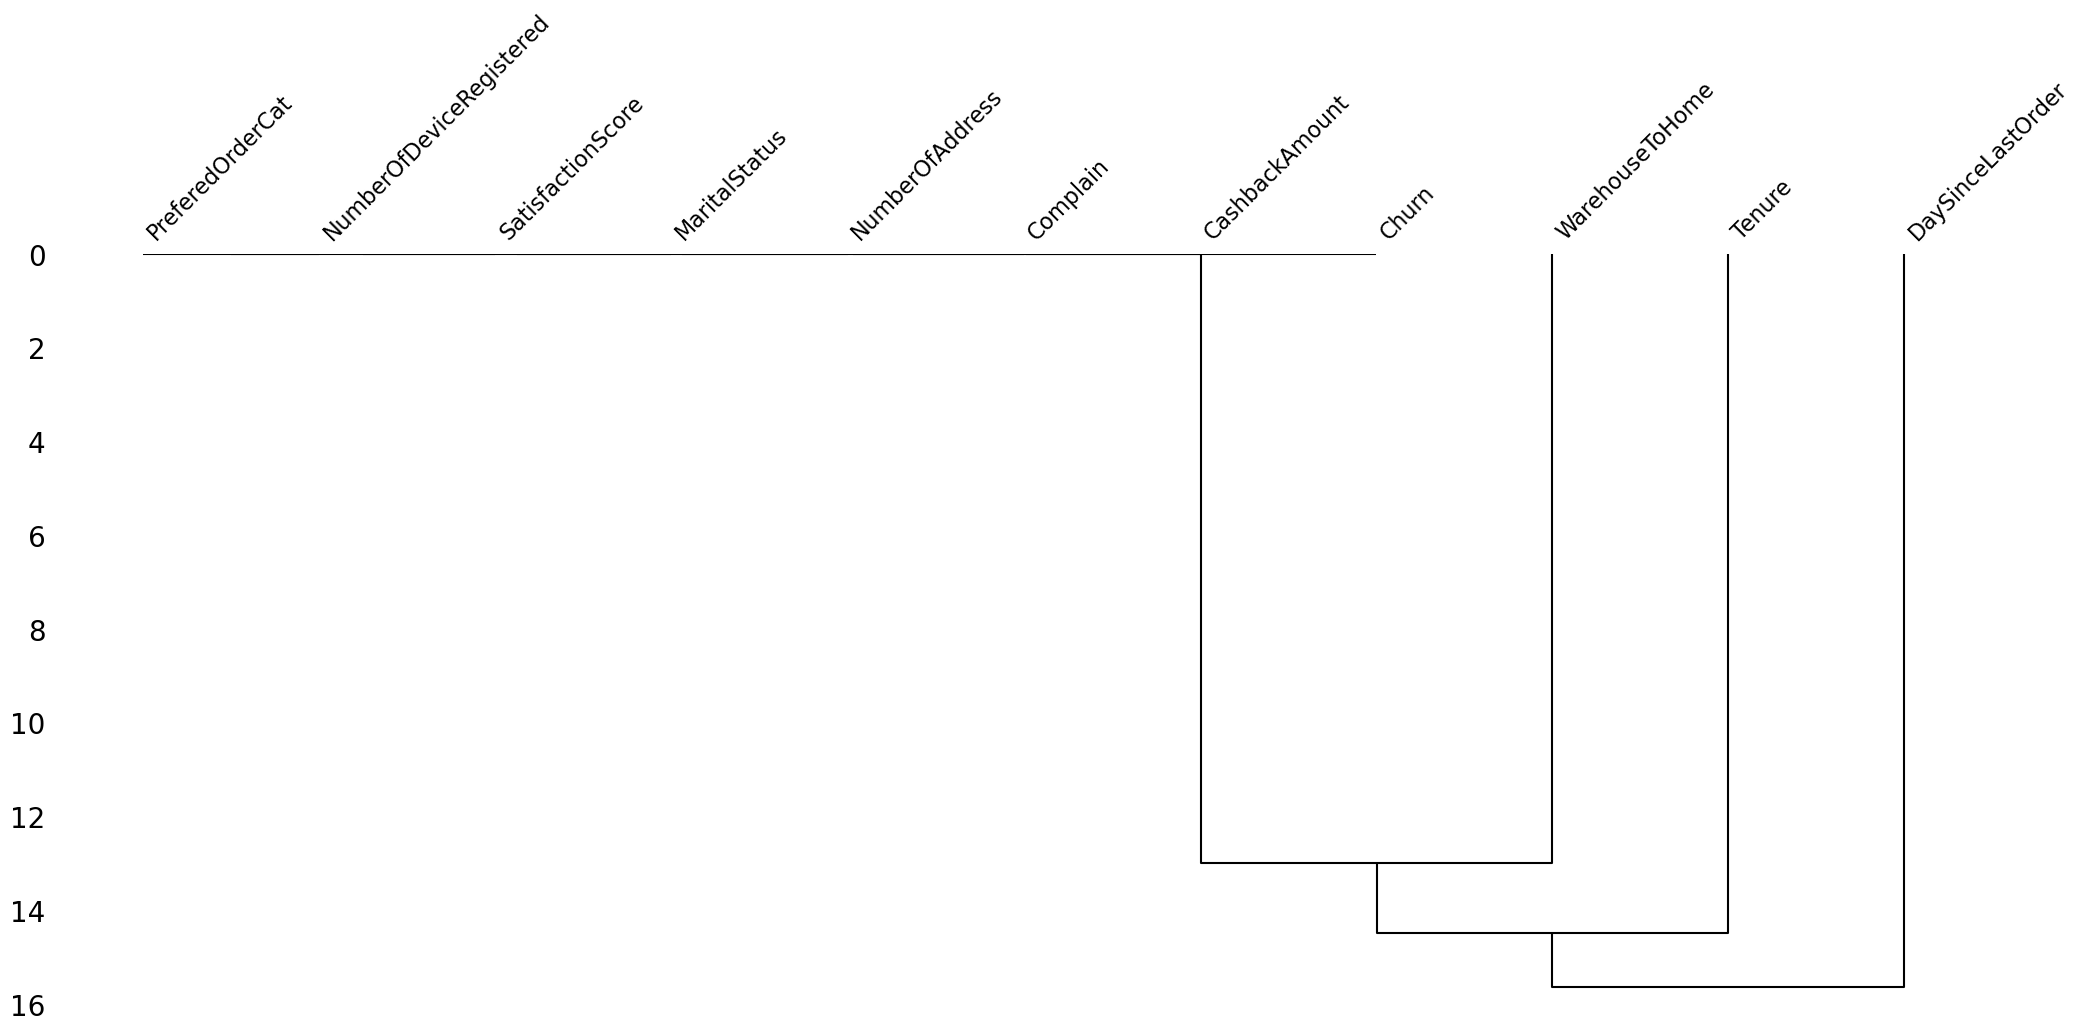

In [12]:
missingno.dendrogram(df)
plt.show()

<p>Berdasarkan dendogram tersebut, terlihat bahwa benar kolom 'Tenure', 'WarehouseToHome' dan, 'DaySinceLastOrder' memang tidak berkorelasi dari segi missing values/datanya. Kemudian kolom 'NumberOfDeviceRegistered','PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus','NumberOfAddress', 'Complain', 'CashbackAmount','Churn' berada di titik 0 karena mereka tidak mempunyai missing values/data.</p> 

#### Statistik Missing Values

In [13]:
df[df['DaySinceLastOrder'].isna()].describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,0.0,213.000000,213.000000
mean,11.530516,15.647887,4.103286,2.915493,4.877934,0.272300,NaN,220.923052,0.187793
std,8.281330,8.079963,0.894764,1.418342,2.606981,0.446192,NaN,6.621594,0.391467
min,0.000000,6.000000,1.000000,1.000000,1.000000,0.000000,NaN,209.340000,0.000000
25%,5.000000,9.000000,4.000000,2.000000,3.000000,0.000000,NaN,214.980000,0.000000
50%,10.000000,14.000000,4.000000,3.000000,4.000000,0.000000,NaN,221.690000,0.000000
75%,17.000000,19.000000,5.000000,4.000000,6.000000,1.000000,NaN,227.090000,0.000000
max,31.000000,36.000000,6.000000,5.000000,11.000000,1.000000,NaN,231.420000,1.000000


In [14]:
df_1 = df[df['DaySinceLastOrder'].isna() == True][['MaritalStatus','PreferedOrderCat']].value_counts()
df_1 = pd.DataFrame(df_1).reset_index()
df_1

,MaritalStatus,PreferedOrderCat,0
0,Married,Fashion,92
1,Single,Fashion,50
2,Divorced,Fashion,24
3,Married,Laptop & Accessory,20
4,Single,Laptop & Accessory,11
5,Married,Grocery,9
6,Divorced,Laptop & Accessory,4
7,Divorced,Grocery,2
8,Single,Grocery,1


In [15]:
df_1.rename({0: 'Nilai'}, axis=1, inplace=True)

In [16]:
df_1.columns

Index(['MaritalStatus', 'PreferedOrderCat', 'Nilai'], dtype='object')

##### Bar Plot

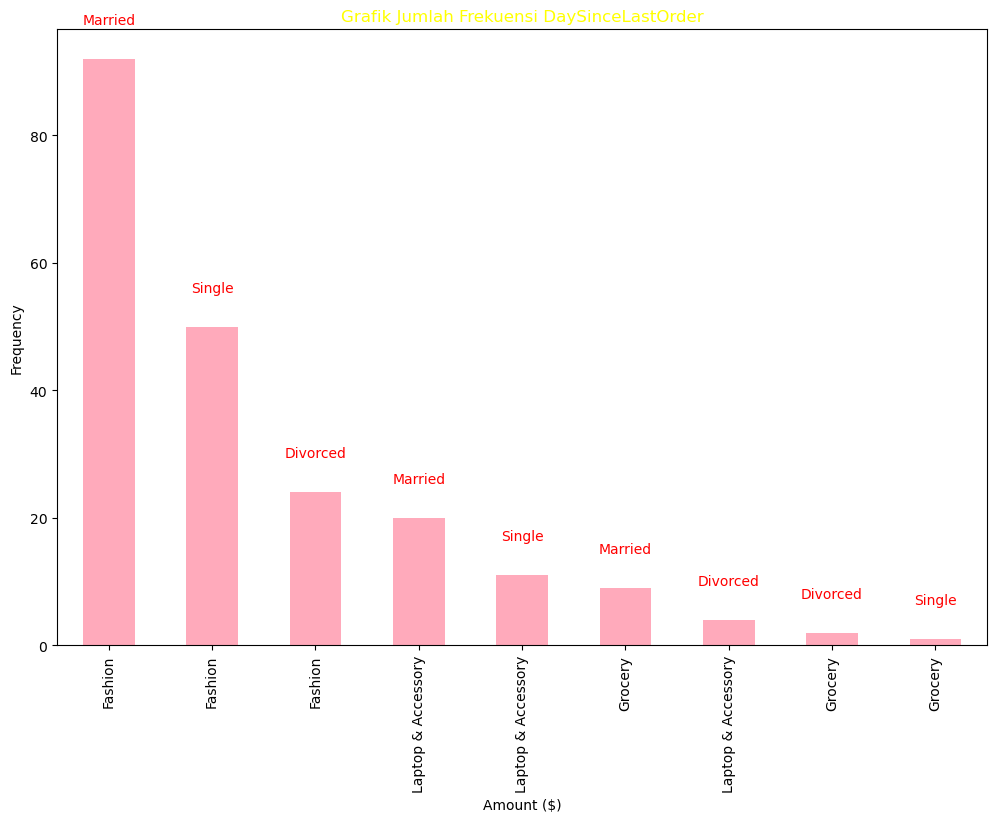

In [17]:
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = df_1['Nilai'].plot(kind="bar", color = '#ffaabb')
ax.set_title("Grafik Jumlah Frekuensi DaySinceLastOrder", color = 'yellow')
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Frequency")
ax.set_xticklabels(df_1['PreferedOrderCat'])

rects = ax.patches

# Make some labels.
labels = df_1['MaritalStatus']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", color = 'red'
    )

plt.show()

<p>Analisi Grafik Jumlah Frekuensi DaySinceLastOrder :</p>
<p>Data kosong pada <b>DaySinceLastOrder</b> pada posisi tertinggi ada pada kategory pesanan pelangan pada Fahsion dengan status pelanggan telah menikah dengan Frekuensi lebih dari 80 keatas. Pada posisi ke-2 dan ke-3 diukuti oleh kategori Fashion juga walau dengan status Singel dan Cerai masing-masing memiliki frekuensi 50 dan 23.</p>

In [18]:
df[(df['Tenure'].isna())].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WarehouseToHome,194.0,14.556701,7.714422,6.0,8.00,13.00,19.000,34.00
NumberOfDeviceRegistered,194.0,3.288660,0.801020,1.0,3.00,3.00,4.000,5.00
SatisfactionScore,194.0,3.180412,1.284998,1.0,3.00,3.00,4.000,5.00
NumberOfAddress,194.0,3.144330,2.332424,1.0,2.00,2.00,4.000,19.00
Complain,194.0,0.257732,0.438517,0.0,0.00,0.00,1.000,1.00
DaySinceLastOrder,194.0,2.025773,2.328992,0.0,0.00,2.00,3.000,13.00
CashbackAmount,194.0,120.363660,2.737009,112.0,120.22,121.07,122.175,123.13
Churn,194.0,0.329897,0.471392,0.0,0.00,0.00,1.000,1.00


In [19]:
df_2 = df[df['Tenure'].isna() == True][['MaritalStatus','PreferedOrderCat']].value_counts()
df_2 = pd.DataFrame(df_2).reset_index()
df_2

,MaritalStatus,PreferedOrderCat,0
0,Married,Mobile,78
1,Single,Mobile,48
2,Divorced,Mobile,25
3,Single,Mobile Phone,20
4,Married,Mobile Phone,11
5,Divorced,Mobile Phone,4
6,Married,Laptop & Accessory,4
7,Divorced,Laptop & Accessory,2
8,Single,Laptop & Accessory,2


In [20]:
df_2.rename({0: 'Nilai'}, axis=1, inplace=True)

In [21]:
df_2.columns

Index(['MaritalStatus', 'PreferedOrderCat', 'Nilai'], dtype='object')

##### Bar Plot

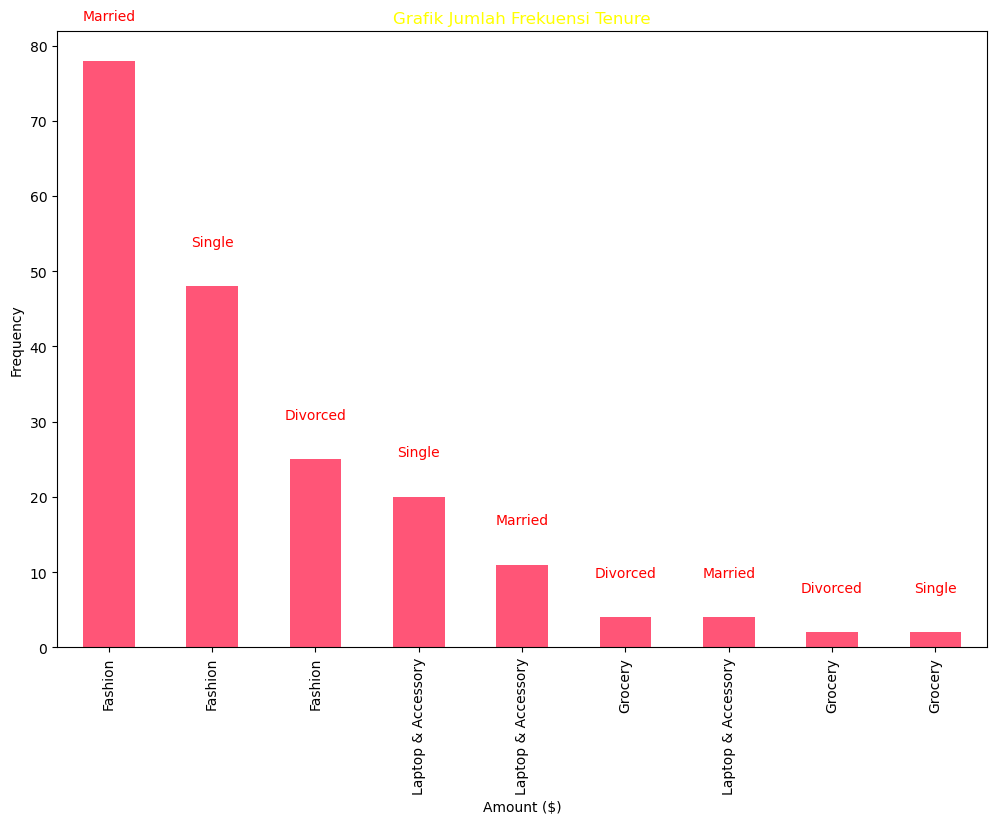

In [22]:
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = df_2['Nilai'].plot(kind="bar",color = '#ff5577')
ax.set_title("Grafik Jumlah Frekuensi Tenure", color = 'yellow')
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Frequency")
ax.set_xticklabels(df_1['PreferedOrderCat'])

rects = ax.patches

# Make some labels.
labels = df_2['MaritalStatus']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", color = 'red'
    )

plt.show()

<p>Analisi Grafik Jumlah Frekuensi Tenure :</p>
<p>Data kosong pada <b>Tenure</b> pada posisi tertinggi ada pada kategory pesanan pelangan pada Fahsion dengan status pelanggan telah menikah dengan Frekuensi 78. Pada posisi ke-2 dan ke-3 diukuti oleh kategori Fashion juga walau dengan status Singel dan Cerai masing-masing memiliki frekuensi 48 dan 25.</p>

In [23]:
df[df['WarehouseToHome'].isna() == True].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,169.0,6.337278,7.480043,0.00,0.00,4.00,11.00,30.00
WarehouseToHome,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfDeviceRegistered,169.0,3.201183,0.849229,1.00,3.00,3.00,4.00,5.00
SatisfactionScore,169.0,3.082840,1.449220,1.00,2.00,3.00,4.00,5.00
NumberOfAddress,169.0,3.514793,2.526306,1.00,2.00,2.00,5.00,10.00
Complain,169.0,0.301775,0.460392,0.00,0.00,0.00,1.00,1.00
DaySinceLastOrder,169.0,2.461538,2.712405,0.00,0.00,2.00,3.00,15.00
CashbackAmount,169.0,124.584793,0.987585,123.18,123.72,124.39,125.59,126.57
Churn,169.0,0.355030,0.479944,0.00,0.00,0.00,1.00,1.00


In [24]:
df_3 = df[df['WarehouseToHome'].isna() == True][['MaritalStatus','PreferedOrderCat']].value_counts()
df_3 = pd.DataFrame(df_3).reset_index()
df_3

,MaritalStatus,PreferedOrderCat,0
0,Married,Mobile,70
1,Single,Mobile,68
2,Divorced,Mobile,24
3,Married,Laptop & Accessory,4
4,Single,Laptop & Accessory,2
5,Divorced,Laptop & Accessory,1


In [25]:
df_3.rename({0: 'Nilai'}, axis=1, inplace=True)

In [26]:
df_3.columns

Index(['MaritalStatus', 'PreferedOrderCat', 'Nilai'], dtype='object')

##### Bar Plot

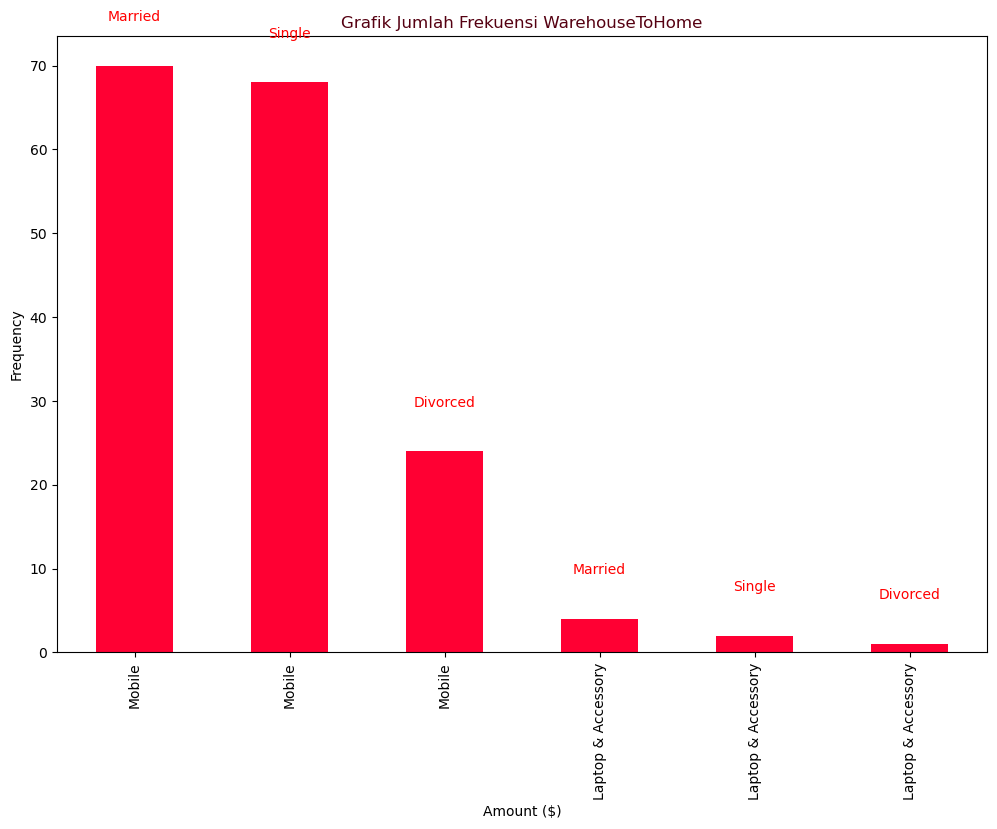

In [27]:
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = df_3['Nilai'].plot(kind="bar", color = '#ff0033')
ax.set_title("Grafik Jumlah Frekuensi WarehouseToHome", color = '#550011')
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Frequency")
ax.set_xticklabels(df_3['PreferedOrderCat'])

rects = ax.patches

# Make some labels.
labels = df_3['MaritalStatus']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", color = 'red'
    )

plt.show()

<p>Analisi Grafik Jumlah Frekuensi WarehouseToHome :</p>
<p>Data kosong pada <b>WarehouseToHome</b> pada posisi tertinggi ada pada kategory pesanan pelangan pada Mobile dengan status pelanggan telah menikah dengan Frekuensi 68. Pada posisi ke-2 dan ke-3 diukuti oleh kategori Mobile juga walau dengan status Singel dan Cerai masing-masing memiliki frekuensi 66 dan 23.</p>

<p>Analisi Ke-3 Grafik Diatas :</p>
<p>Data kosong pada <b>DaySinceLastOrder, Tenure dan, WarehouseToHome</b> memiliki hubungan satu sama lain karena kolom satu saling mempengaruhi kolom lainnya pada kolum MaritalStatus.</p>
<p>Married(sudah menikah), Single(sendiri) dan, Divorce(cerai) adalah MaritalStatus yang menduduki peringat pertama sampai ke tiga pada DaySinceLastOrder, Tenure dan, WarehouseToHome.</p>

#### Handling Missing Values

###### Check_Point

In [28]:
df_cleaned = df.copy()
df_cleaned.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [29]:
# Mengisi data kosong pada DaySinceLastOrder
df_cleaned['DaySinceLastOrder'] = df_cleaned['DaySinceLastOrder'].fillna(df_cleaned['DaySinceLastOrder'].median())

In [30]:
# Mengisi data kosong pada Tenure
df_cleaned['Tenure'] = df_cleaned['Tenure'].fillna(df_cleaned['Tenure'].median())

In [31]:
# Mengisi data kosong pada WarehouseToHome
df_cleaned['WarehouseToHome'] = df_cleaned['WarehouseToHome'].fillna(df_cleaned['WarehouseToHome'].median())

In [32]:
df_cleaned.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

### Data Analysis

#### Penilaian Normalitas

##### Grapical Methods

Untuk mengetahui karakteristik dari 'Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount' maka kita akan melihat distribusi datanya menggunakan Histogram.

In [33]:

num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Churn']))]

In [34]:
num_features

['Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount']

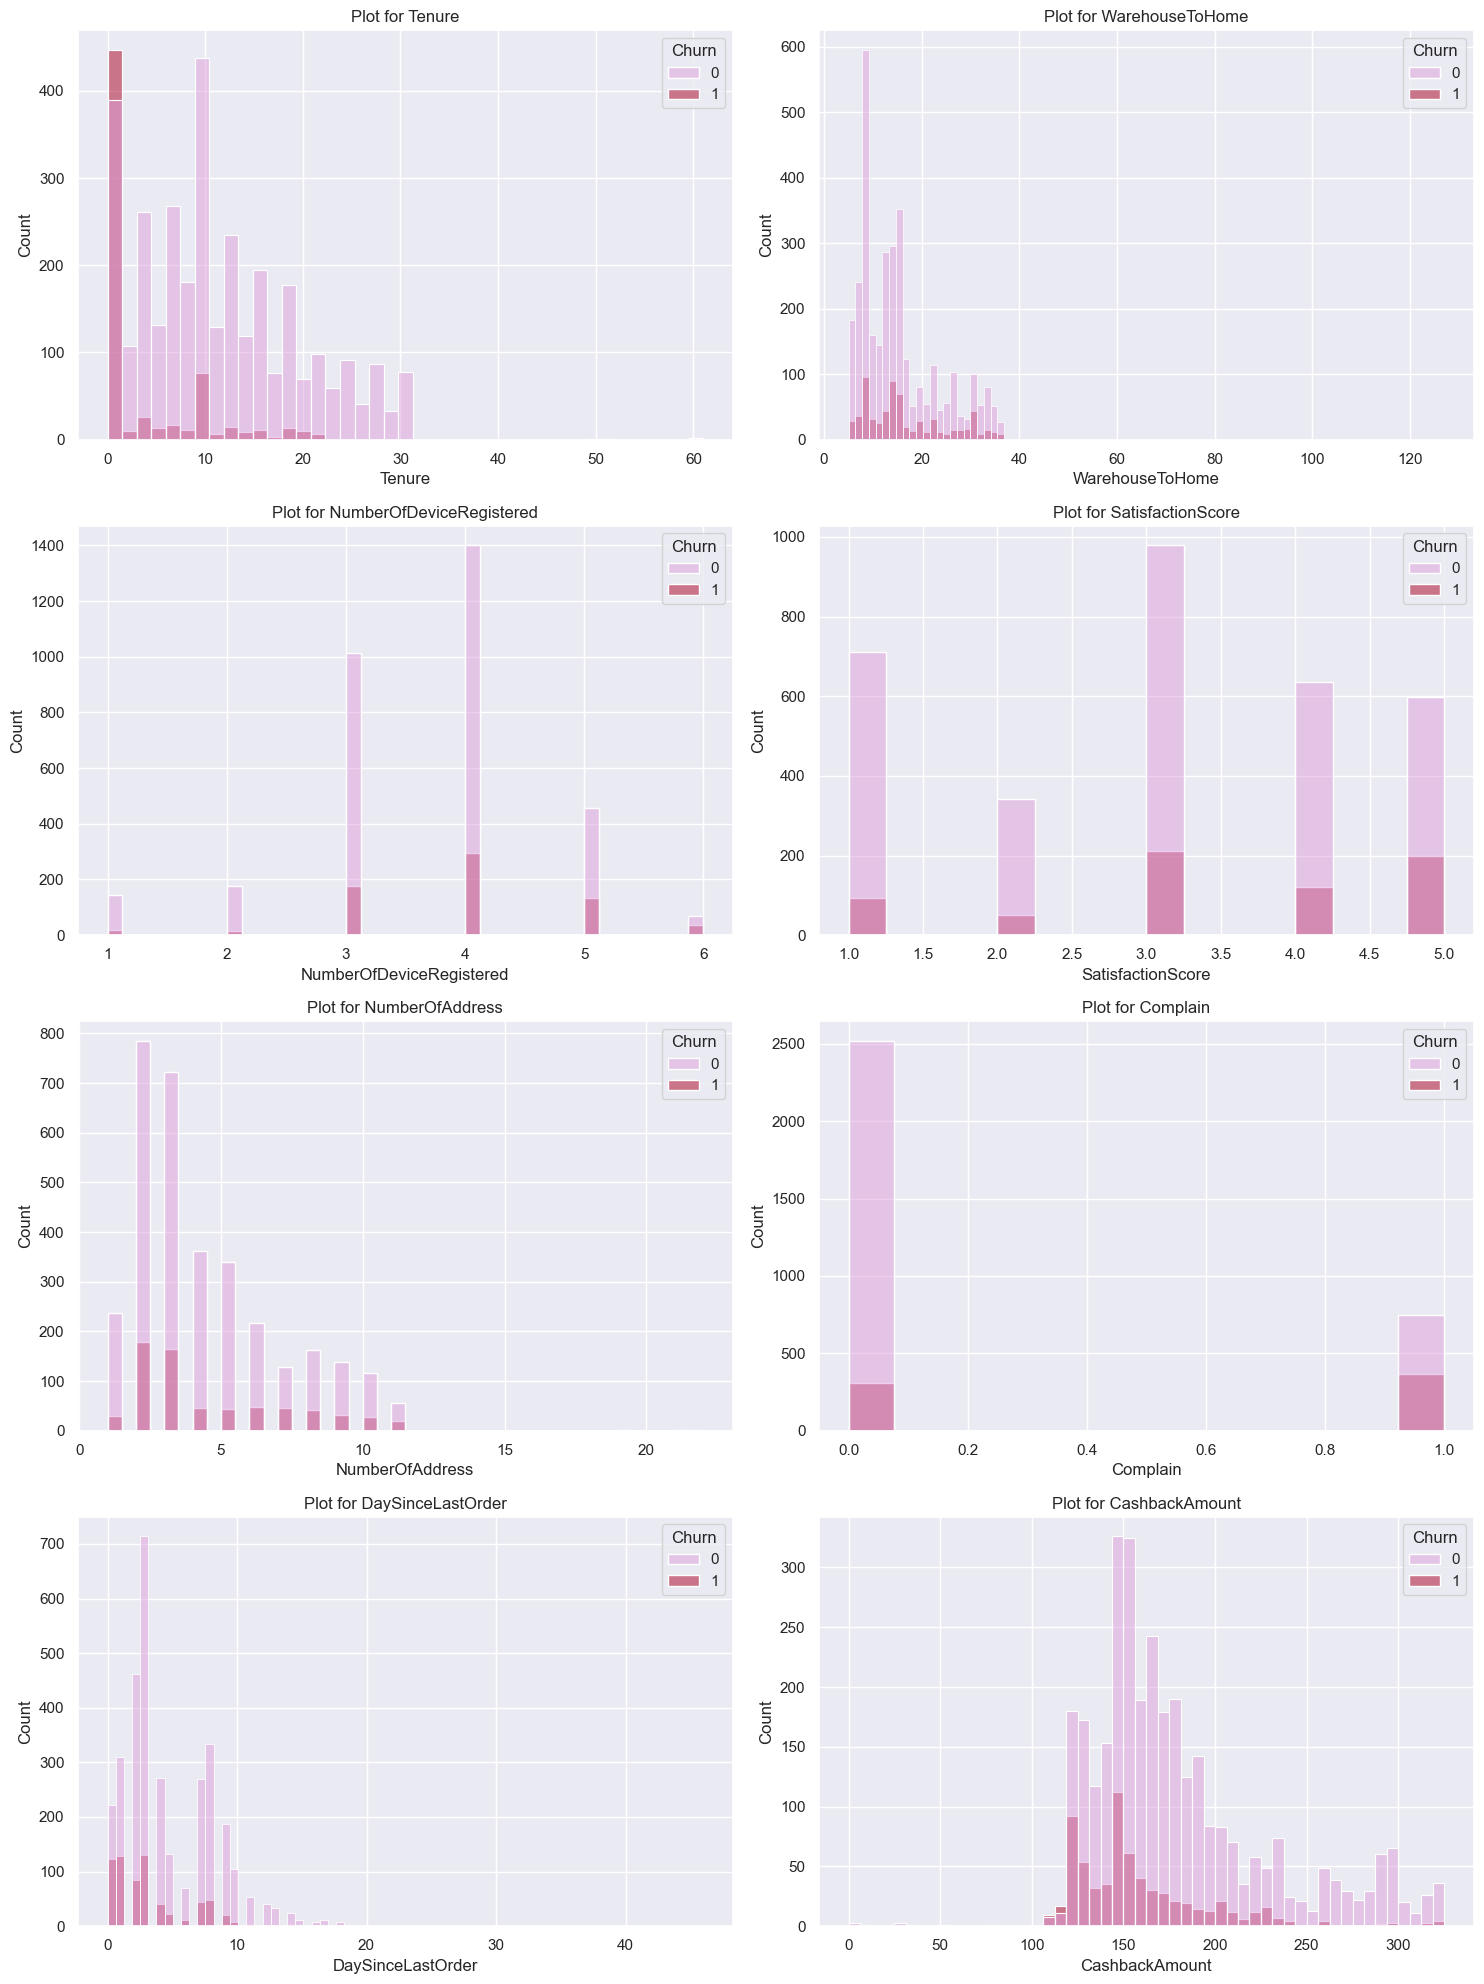

In [35]:
# Visualisasi
count=0
fig = plt.figure(figsize=(15, 20))
palette = ['plum', '#aa0022']
sns.set(palette='bright')
categorical_feature= num_features
for feature in categorical_feature:
    count +=1 
    ax= plt.subplot(4,2,count)
    sns.histplot(data=df_cleaned,x=feature, hue='Churn',palette=palette)
    plt.title("Plot for {}".format(feature))
    fig.tight_layout()
plt.show()

###### Checking Outlier 

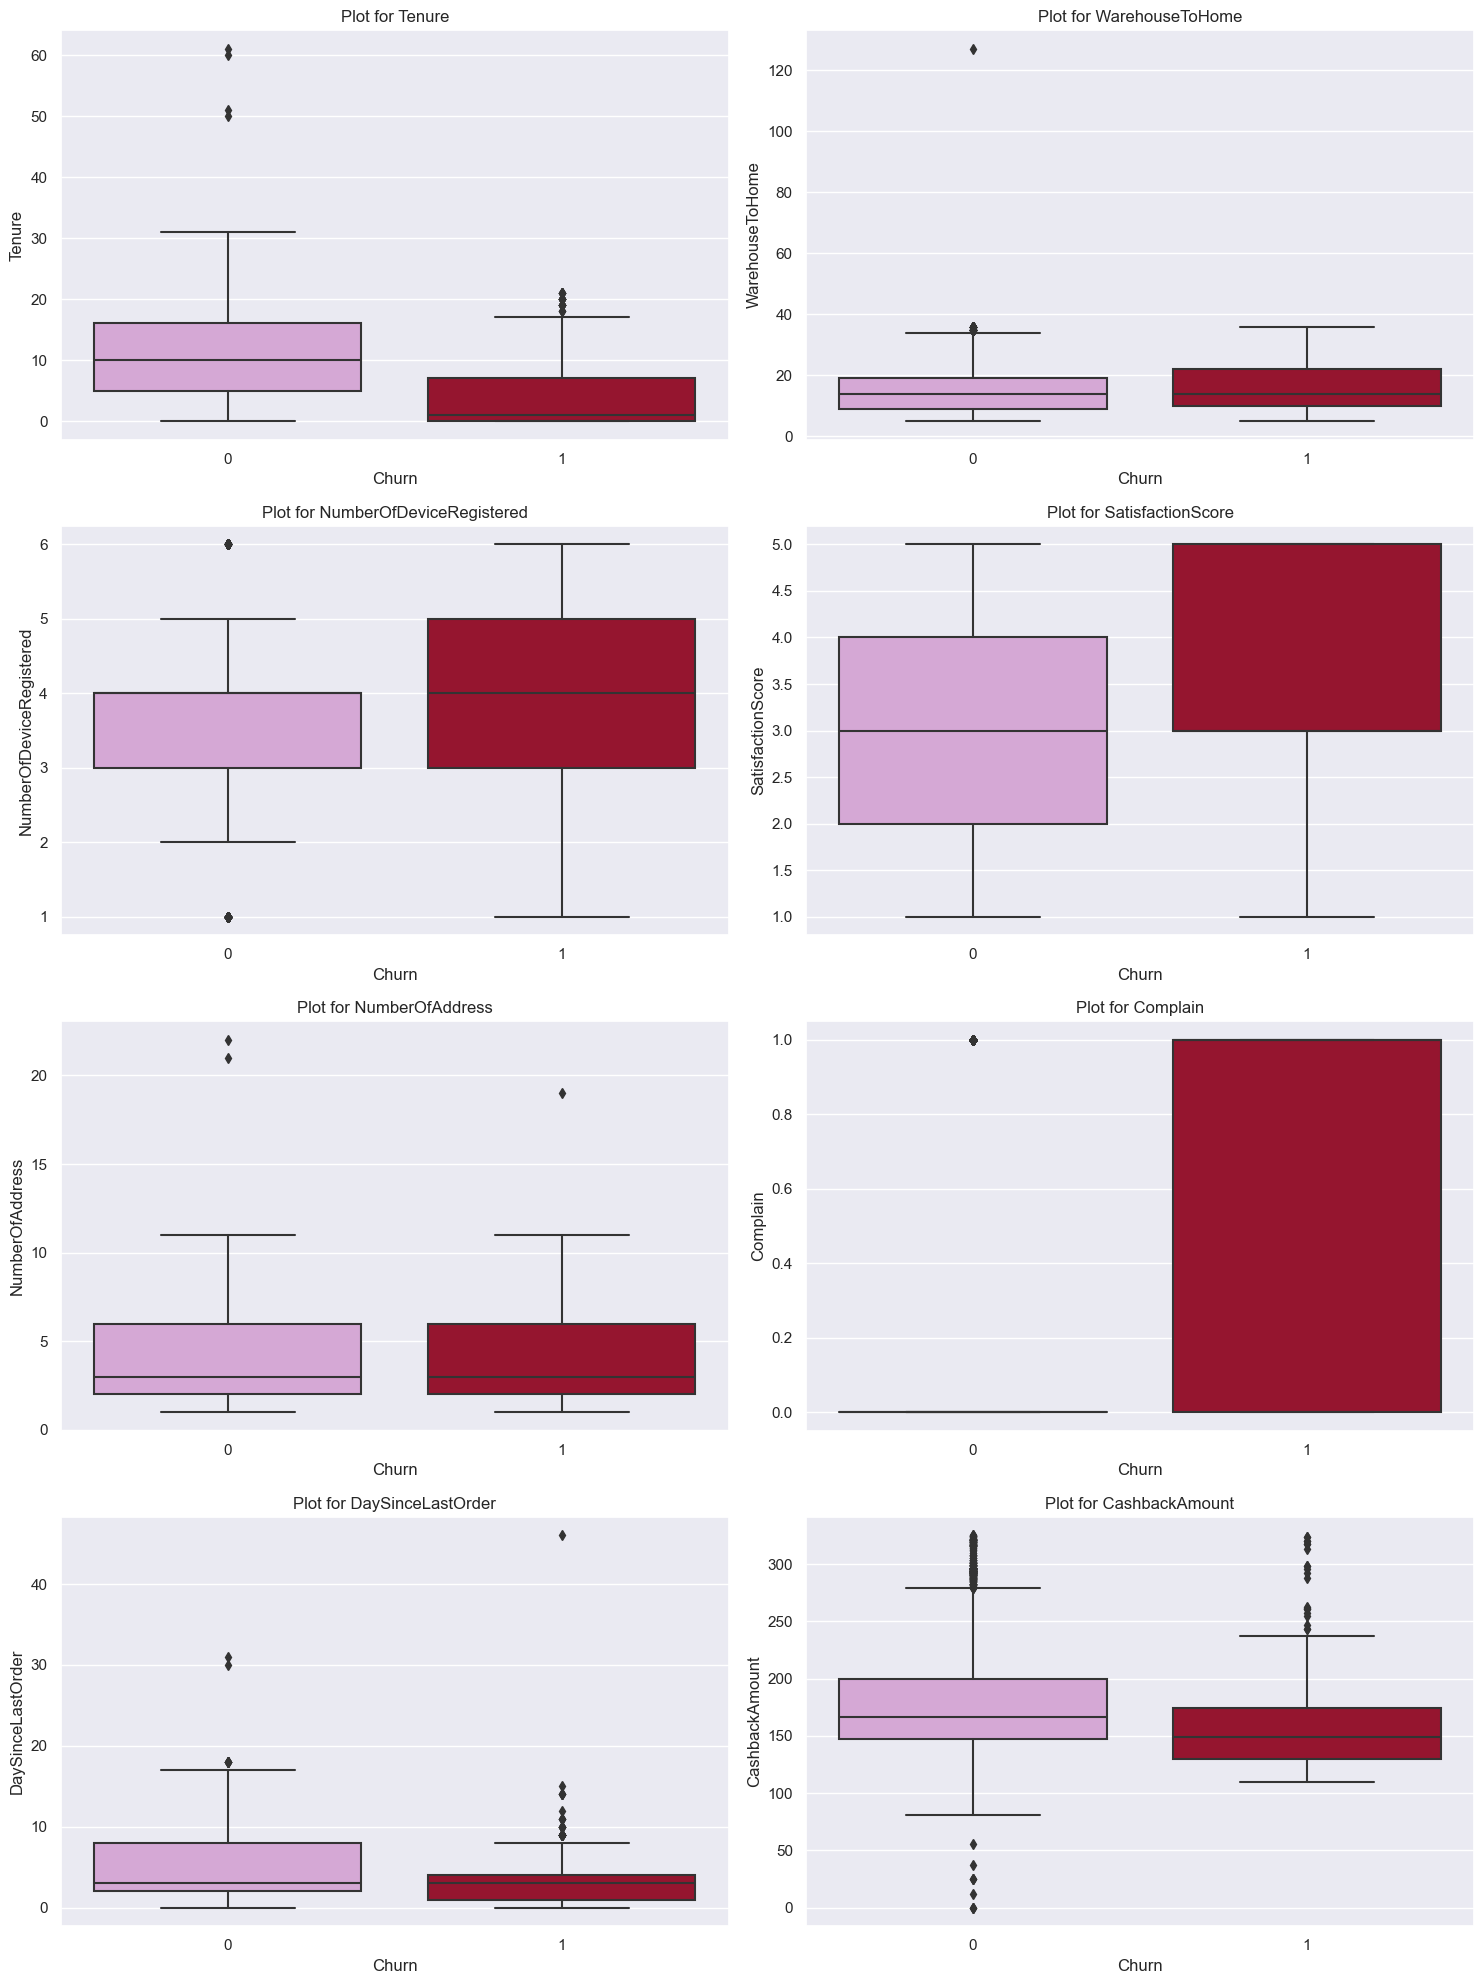

In [36]:
# Visualisasi
count=0
fig = plt.figure(figsize=(15, 20))
palette = ['plum', '#aa0022']
sns.set(palette='bright')
categorical_feature= num_features
for feature in categorical_feature:
    count +=1 
    ax= plt.subplot(4,2,count)
    sns.boxplot(data=df_cleaned,y=feature, x='Churn',palette=palette)
    plt.title("Plot for {}".format(feature))
    fig.tight_layout()
plt.show()

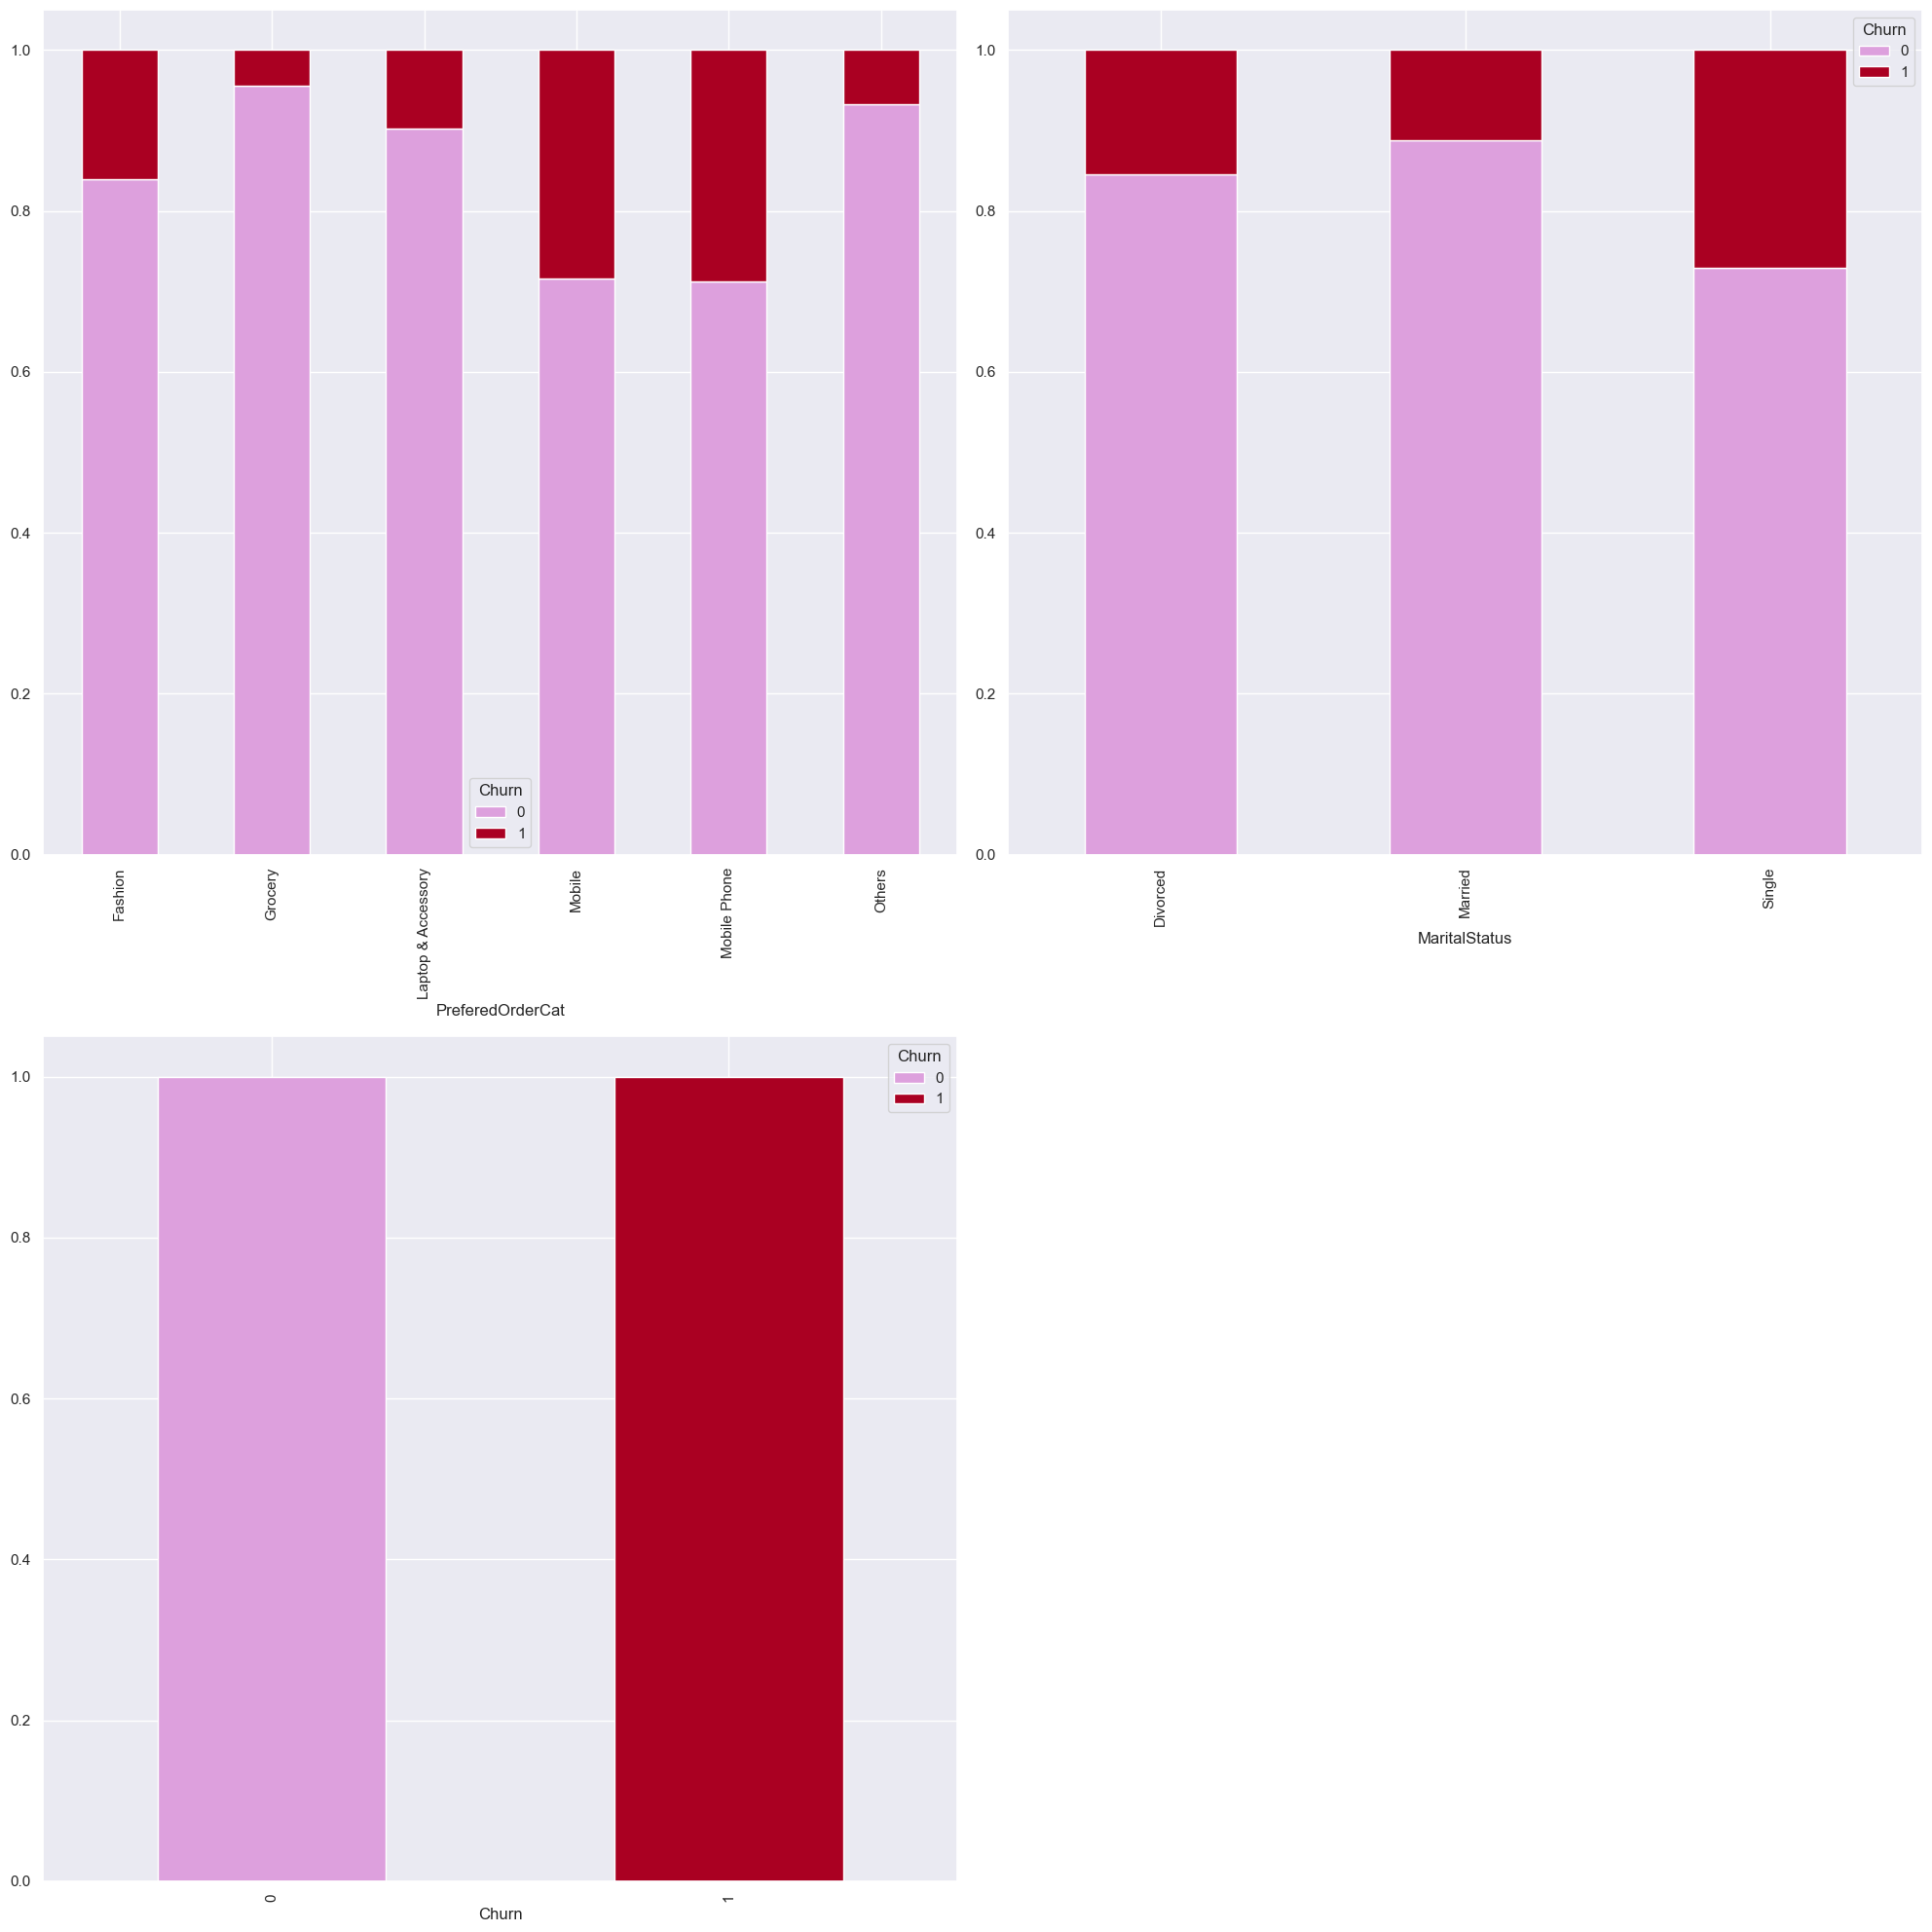

In [37]:
count = 0
fig = plt.figure(figsize=(20,20))


for i in df_cleaned.drop(columns=['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']).columns:
    count +=1
    ax= plt.subplot(2,2,count)
    pd.crosstab(df_cleaned[i],df_cleaned['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax, color = ['plum', '#aa0022'])
    fig.tight_layout()

plt.show()

In [38]:
for i in df_cleaned.drop(columns=['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']).columns:
    relevent_experience_df = df_cleaned.groupby(i)['Churn'].value_counts(normalize=True).unstack()
    display(relevent_experience_df.sort_values(by=[1.0], ascending=False))

Churn,0,1
PreferedOrderCat,,
Mobile Phone,0.712514,0.287486
Mobile,0.715564,0.284436
Fashion,0.839316,0.160684
Laptop & Accessory,0.902606,0.097394
Others,0.932961,0.067039
Grocery,0.956044,0.043956


Churn,0,1
MaritalStatus,,
Single,0.729008,0.270992
Divorced,0.845486,0.154514
Married,0.888078,0.111922


Churn,0,1
Churn,,
1,NaN,1.0
0,1.0,NaN


<p>Berdasarkan barplot dan table diatas kita dapat menyimpulkan beberapa hal :</p>
<p>1.  Pada Prefered OrderCat yang paling banyak tidak churn adalah yang justru melakukan pembelian di Grocery dengan akurasi 0.95 atau 95%. Sedangkan yang paling banyak churn justru yang melalui Mobile Phone dengan nilai 0.28 atau 28%.</p>
<p>2. Pembeli pada MaritalStatus yang berstatus sudah menikah atau Married adalah yang paling banyak tidak churn dengan nilai 0.88 atau 88 %. Sedangkan dengan MaritalStatus singel atau sendiri adalah yang paling banyak melakukan churn dengan nilai 0.27 atau 27%</p>
<p>3. Pada tabel churn masih belum terlihat apakah data yang churn dan tidak churn belum di ketahui pendistribusian datanya. </p>
<p>Apakah akan condong kesuatu sisi langsung kita akan coba cek apakah Data pada Churn itu Imbalance atau tidak</p>

In [39]:
# Persentase Pelanggan Churn dan Tidak Churn
df_cleaned['Churn'].value_counts()

0    3267
1     674
Name: Churn, dtype: int64

In [40]:
df['Churn'].value_counts()/len(df) * 100

0    82.897742
1    17.102258
Name: Churn, dtype: float64

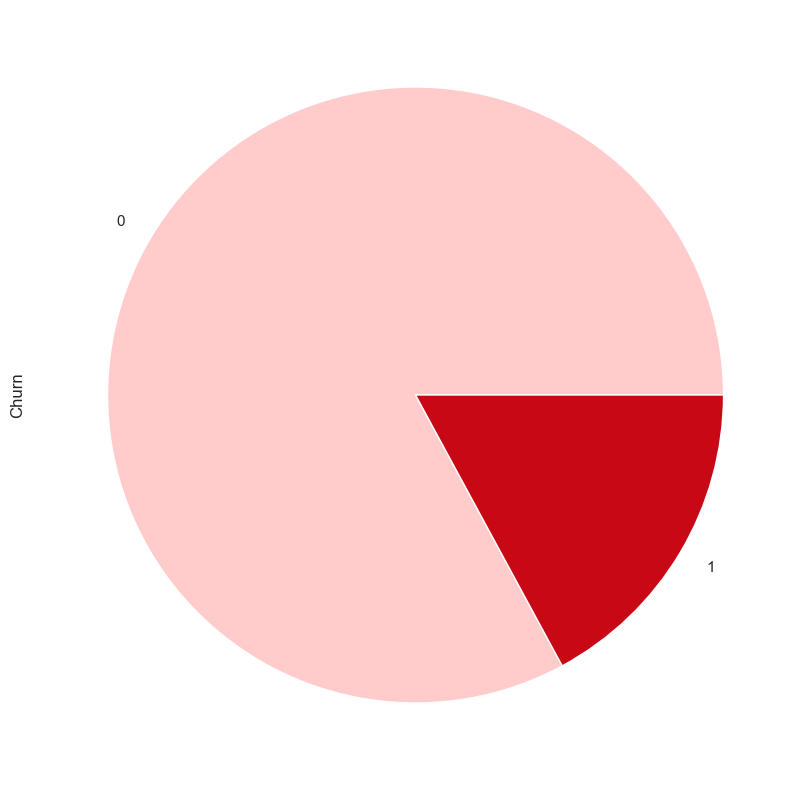

In [41]:
fig = plt.figure(figsize=(10,10))
df_cleaned['Churn'].value_counts().plot(kind='pie',colors=['#FFCBCB', '#C80815'])
plt.show()

## Feature selection, & Feature Engineering

### Data Preparation

In [42]:
df.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

##### Mengecek Missing Value pada Data 

In [43]:
df.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

##### Handling Missing Value Menggunakan KNNImputer

In [44]:
knn_impute = KNNImputer()
knn_var = ['DaySinceLastOrder','Tenure', 'WarehouseToHome']
df[knn_var] = knn_impute.fit_transform(df[knn_var])

In [45]:
df.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

In [46]:
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,4.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,16.0,4,Mobile,3,Married,10,1,0.0,124.37,1


In [47]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Others',
       'Mobile Phone', 'Grocery'], dtype=object)

In [48]:
onehot = OneHotEncoder() # kita tidak dapa drop data pertama karena menggunakan data klasifikasi
onehot_var = ['MaritalStatus']




binary = ce.BinaryEncoder()
binary_pipe = Pipeline([
                       
                        ('encoder', binary)
])
binary_var = ['PreferedOrderCat']

transformer = ColumnTransformer([
                        ('one hot encoder', onehot, onehot_var),
                        ('binary encoder',binary_pipe, binary_var)
                        ], remainder = 'passthrough')

In [49]:
transformer.transformers

[('one hot encoder', OneHotEncoder(), ['MaritalStatus']),
 ('binary encoder',
  Pipeline(steps=[('encoder', BinaryEncoder())]),
  ['PreferedOrderCat'])]

In [50]:
# transformer.transformers_

##### Data splitting

In [51]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [52]:
X_train, X_test, y_train, y_test  = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.3,
    random_state = 42
)

In [53]:
testing = pd.DataFrame(transformer.fit_transform(X_train))
testing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,15.0,4.0,3.0,3.0,0.0,10.0,166.48
1,0.0,1.0,0.0,0.0,1.0,0.0,9.0,35.0,5.0,3.0,2.0,0.0,3.0,149.30
2,1.0,0.0,0.0,0.0,0.0,1.0,4.0,29.0,4.0,2.0,1.0,0.0,8.0,155.82
3,0.0,0.0,1.0,0.0,1.0,0.0,21.0,9.0,4.0,3.0,6.0,0.0,1.0,149.79
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,16.0,4.0,2.0,3.0,0.0,3.0,151.10


##### Data Splitting

In [54]:
X_train_prep = transformer.fit_transform(X_train)
X_test_prep = transformer.fit_transform(X_test)

In [55]:
X_test_prep

array([[  0.  ,   0.  ,   1.  , ...,   0.  ,   3.  , 150.  ],
       [  0.  ,   0.  ,   1.  , ...,   0.  ,   4.  , 145.07],
       [  1.  ,   0.  ,   0.  , ...,   0.  ,   3.  , 193.04],
       ...,
       [  0.  ,   0.  ,   1.  , ...,   0.  ,   1.  , 140.14],
       [  0.  ,   1.  ,   0.  , ...,   0.  ,   3.  , 134.77],
       [  0.  ,   0.  ,   1.  , ...,   0.  ,  14.  , 127.43]])

In [56]:
onehot_fitur = list(transformer.transformers_[0][1].get_feature_names_out())

In [57]:
binary_fitur = transformer.transformers_[1][1]['encoder'].get_feature_names_out()

In [58]:
features = onehot_fitur + binary_fitur + ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount'
                                    ]

In [59]:
features

['MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'PreferedOrderCat_0',
 'PreferedOrderCat_1',
 'PreferedOrderCat_2',
 'Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount']

In [60]:
testing1 = pd.DataFrame(X_train_prep, columns = features)
testing1.head()

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PreferedOrderCat_0,PreferedOrderCat_1,PreferedOrderCat_2,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,15.0,4.0,3.0,3.0,0.0,10.0,166.48
1,0.0,1.0,0.0,0.0,1.0,0.0,9.0,35.0,5.0,3.0,2.0,0.0,3.0,149.30
2,1.0,0.0,0.0,0.0,0.0,1.0,4.0,29.0,4.0,2.0,1.0,0.0,8.0,155.82
3,0.0,0.0,1.0,0.0,1.0,0.0,21.0,9.0,4.0,3.0,6.0,0.0,1.0,149.79
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,16.0,4.0,2.0,3.0,0.0,3.0,151.10


## Analytics (Algorithm, Evaluation Metrics)

### Modeling & Evaluation

In [61]:
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = lgb.LGBMClassifier(random_state=42)
hbgb = HistGradientBoostingClassifier(random_state=42)
# tambahkan random state

In [62]:
models = [logreg,knn,dt,rf,xgb,lgbm,hbgb]
score=[]
rata=[]
std=[]


for i in models:
    skfold=StratifiedKFold(n_splits=5, random_state=42,shuffle=True) # add random state
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='roc_auc',verbose = 1)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
#     fld.append(model_cv.elapsed())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM','HistGBC'],'mean roc_auc':rata,'sdev':std}).set_index('model')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

,mean roc_auc,sdev
model,,
Logistic Regression,0.875290,0.011230
KNN,0.807152,0.034590
Decision Tree,0.817426,0.009756
Random Forest,0.951691,0.007244
XGBoost,0.948162,0.010060
LightGBM,0.948260,0.009948
HistGBC,0.946408,0.009903


In [63]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM','HistGBC'],'mean roc_auc':rata,'sdev':std, 'time':[0,0,0,0.9,0.4,0.2,1.8]}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

,mean roc_auc,sdev,time
model,,,
Random Forest,0.951691,0.007244,0.9
LightGBM,0.948260,0.009948,0.2
XGBoost,0.948162,0.010060,0.4
HistGBC,0.946408,0.009903,1.8
Logistic Regression,0.875290,0.011230,0.0
Decision Tree,0.817426,0.009756,0.0
KNN,0.807152,0.034590,0.0


#### Model Benchmarking : Test Data

In [64]:
models = [logreg,knn,dt,rf,xgb,lgbm,hbgb]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    X_train,X_test
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM','HistGBC']):
    estimator,y_pred,X_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(X_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM','HistGBC'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       981
           1       0.70      0.46      0.56       202

    accuracy                           0.87      1183
   macro avg       0.80      0.71      0.74      1183
weighted avg       0.86      0.87      0.86      1183

KNN 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       981
           1       0.62      0.40      0.49       202

    accuracy                           0.86      1183
   macro avg       0.75      0.68      0.70      1183
weighted avg       0.84      0.86      0.84      1183

Decision Tree 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       981
           1       0.76      0.74      0.75       202

    accuracy                           0.91      1183
   macro avg       0.85      0.84      0.85      1183
weighted avg       0.91      0

,roc_auc score
model,
LightGBM,0.957333
Random Forest,0.956455
XGBoost,0.953594
HistGBC,0.952478
Logistic Regression,0.866493
Decision Tree,0.844347
KNN,0.829940


#### Test Oversampling with K-Fold Cross Validation

In [65]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [66]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [67]:
data = X_train
target = y_train

In [68]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler()

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train)

    # instantiate model
    lgbm = lgb.LGBMClassifier()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',lgbm)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

#### Evaluation Metrics Without Oversampling

In [69]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.996374,0.927536,0.999949,0.952430,0.993630,0.869565,0.992941,0.765957,0.985981,0.800000
1,0.997583,0.949275,0.999951,0.941652,0.995733,0.901709,0.990588,0.744681,0.995272,0.945946
2,0.996374,0.931159,0.999895,0.964229,0.993618,0.865286,0.990588,0.680851,0.988263,0.888889
3,0.998388,0.923913,0.999968,0.954195,0.997161,0.868676,0.995294,0.808511,0.995294,0.760000
4,0.998791,0.923913,0.999936,0.941187,0.997877,0.864221,1.000000,0.765957,0.992991,0.782609
5,0.996374,0.913043,0.999953,0.951872,0.993582,0.843478,0.983529,0.723404,0.995238,0.755556
6,0.996374,0.934783,0.999944,0.963907,0.993594,0.873626,0.988208,0.687500,0.990544,0.916667
7,0.996777,0.942029,0.999938,0.969938,0.994290,0.893795,0.985849,0.770833,0.995238,0.880952
8,0.997584,0.916364,0.999931,0.940743,0.995742,0.836821,0.992941,0.638298,0.992941,0.833333
9,0.995973,0.930909,0.999895,0.966592,0.992903,0.865200,0.988235,0.680851,0.988235,0.888889


#### Evaluation Metrics With Oversampling

In [70]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.992708,0.923913,0.999944,0.954288,0.992707,0.872758,0.999514,0.851064,0.986091,0.740741
1,0.993194,0.952899,0.999944,0.938400,0.993194,0.912927,1.000000,0.808511,0.986571,0.904762
2,0.994409,0.942029,0.999907,0.966645,0.994409,0.899123,0.999514,0.851064,0.989413,0.816327
3,0.993923,0.913043,0.999946,0.950014,0.993923,0.861862,1.000000,0.893617,0.987992,0.688525
4,0.992465,0.902174,0.999898,0.950664,0.992464,0.843495,1.000000,0.851064,0.985153,0.666667
5,0.994166,0.913043,0.999946,0.955217,0.994166,0.855686,1.000000,0.829787,0.988467,0.709091
6,0.993197,0.942029,0.999937,0.958425,0.993197,0.899123,1.000000,0.833333,0.986577,0.833333
7,0.993197,0.920290,0.999893,0.968293,0.993197,0.863526,1.000000,0.791667,0.986577,0.760000
8,0.994655,0.920000,0.999971,0.951288,0.994655,0.848386,1.000000,0.680851,0.989423,0.820513
9,0.991740,0.941818,0.999880,0.970698,0.991739,0.899046,0.999514,0.851064,0.984211,0.816327


#### Hyperparameter Tuning

In [71]:

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)
ros = RandomOverSampler(random_state=42)
lgbm = lgb.LGBMClassifier()

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])

In [72]:

hyperparam_space=[{
    'model__boosting_type':['gbdt','dart','goss','rf'],
    'model__max_depth': [-2,-1, 1],
    'model__max_bin': [235, 255, 275, 300],
    'model__num_leaves':[21, 31, 41],
    'model__min_data_in_leaf': [15, 20, 25, 30],
    'model__num_iterations':[75, 100, 125],
    'model__learning_rate': [0.075, 0.1, 0.125, 0.150],
    'model__random_state': [42]
}]
     

default hyperparameter LGBM => `boosting_type`</b>='gbdt', `max_depth`</b>=-1, `max_bin`</b>=255, `num_leaves`=31, `min_samples_leaf`=20,`num_iterations`=100,`learning_rate`=0.1,`random_state`=42

In [73]:
grid = GridSearchCV(estimator, n_jobs=-1, param_grid=hyperparam_space, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),verbose = 2)

In [74]:
grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

Fitting 10 folds for each of 6912 candidates, totalling 69120 fits
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
0.9665106158172853
{'model__boosting_type': 'gbdt', 'model__learning_rate': 0.125, 'model__max_bin': 235, 'model__max_depth': -2, 'model__min_data_in_leaf': 25, 'model__num_iterations': 125, 'model__num_leaves': 41, 'model__random_state': 42}


Hyperparameter terbaik LGBM dari hasil Gridsearch => `boosting_type`</b>='gbdt', `max_depth`</b>=-2, `max_bin`</b>=235, `num_leaves`=41, `min_samples_leaf`=25,`num_iterations`=125,`learning_rate`=0.125,`random_state`=42
    
Untuk hyperparameter `boosting_type`default valuenya tetap yang terbaik, untuk `max_depth` bisa di perkecil lagi dan dibandingkan dengan value -1 (value terbaiknya sekarang), untuk `min_samples_leaf` bisa dicoba menggunakan value float seperti angka 20.5 dan dibandingkan dengan 20 (value terbaiknya sekarang), untuk `min_samples_split` bisa dicoba menggunakan value float seperti angka 5.5 dan dibandingkan dengan 5 (value terbaiknya sekarang), `max_bin` bisa dicoba menggunakan angka 200 atau 175dan dibandingkan dengan 255 (valie terbaiknya sekarang). Sedangkan untuk `num_leaves` value terbaiknya adalah 41 sedangkan nilai defaultnya adalah 31 dan `num_iterations` value terbaiknya adalah 125 sedangkan nilai defaultnya adalah 100. 

In [75]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(),
                                                  ['MaritalStatus']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('encoder',
                                                                   BinaryEncoder())]),
                                                  ['PreferedOrderCat'])])),
                ('model',
                 LGBMClassifier(learning_rate=0.125, max_bin=235, max_depth=-2,
                                min_data_in_leaf=25, num_iterations=125,
                                num_leaves=41, random_state=42))])

In [76]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])
estimator.fit(X_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(),
                                                  ['MaritalStatus']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('encoder',
                                                                   BinaryEncoder())]),
                                                  ['PreferedOrderCat'])])),
                ('model', LGBMClassifier())])

In [77]:
y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM: ', roc_auc_tuned)

ROC AUC Score Default LGBM :  0.9564390078151546
ROC AUC Score Tuned LGBM:  0.9604825008494733


In [78]:
log_loss_default = log_loss(y_test, y_pred_proba_default[:,1], labels=[0, 1])
log_loss_tuned = log_loss(y_test, y_pred_proba_tuned[:,1],labels=[0, 1])

print('log_loss Score Default LGBM : ', log_loss_default)
print('log__loss Tuned LGBM : ', log_loss_tuned)

log_loss Score Default LGBM :  0.1774892729367936
log__loss Tuned LGBM :  0.16136928294290617


In [79]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       654
           1       0.79      0.84      0.81       135

    accuracy                           0.93       789
   macro avg       0.88      0.90      0.89       789
weighted avg       0.94      0.93      0.93       789

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       654
           1       0.88      0.81      0.85       135

    accuracy                           0.95       789
   macro avg       0.92      0.90      0.91       789
weighted avg       0.95      0.95      0.95       789



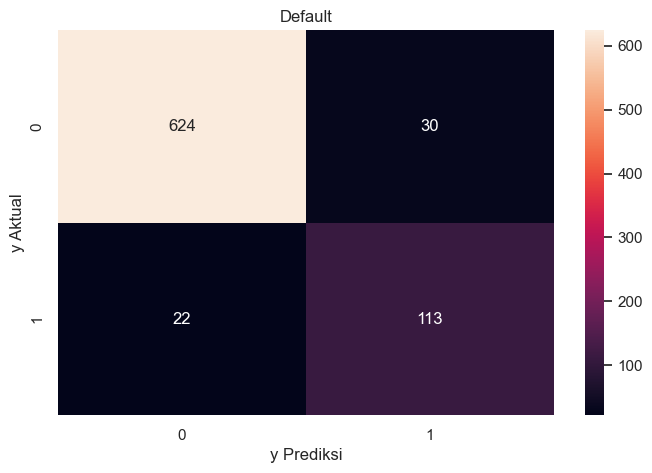

In [80]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_default), annot=True, fmt='.0f', ax=ax)
plt.title('Default')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual');

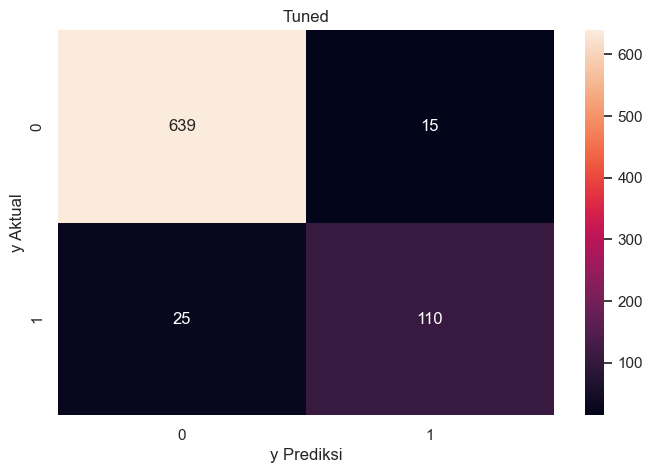

In [81]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='.0f', ax=ax)
plt.title('Tuned')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual');

#### Feature Importances

In [82]:
transformer.transformers_

[('one hot encoder', OneHotEncoder(), ['MaritalStatus']),
 ('binary encoder',
  Pipeline(steps=[('encoder',
                   BinaryEncoder(cols=['PreferedOrderCat'],
                                 mapping=[{'col': 'PreferedOrderCat',
                                           'mapping':     PreferedOrderCat_0  PreferedOrderCat_1  PreferedOrderCat_2
   1                   0                   0                   1
   2                   0                   1                   0
   3                   0                   1                   1
   4                   1                   0                   0
   5                   1                   0                   1
   6                   1                   1                   0
  -1                   0                   0                   0
  -2                   0                   0                   0}]))]),
  ['PreferedOrderCat']),
 ('remainder', 'passthrough', [0, 1, 2, 4, 6, 7, 8, 9])]

In [83]:
len(features)

14

In [84]:
# transformer.get_feature_names_out()

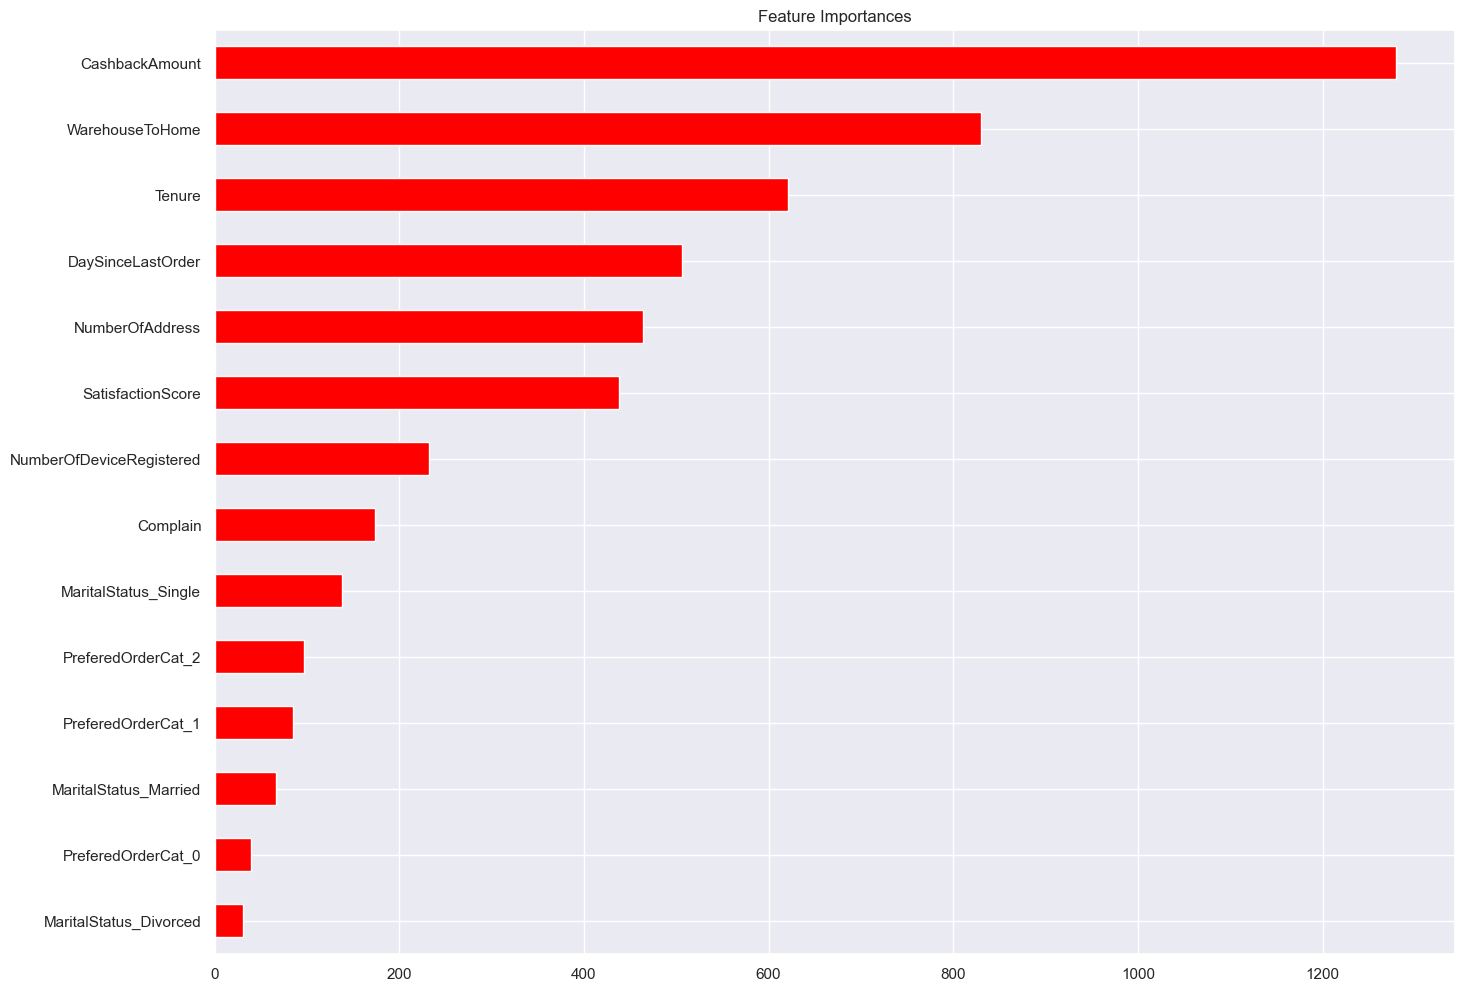

In [85]:
coef1 = pd.Series(best_model['model'].feature_importances_, index = features).sort_values(ascending = True)
plt.figure(figsize=(16,12))
coef1.plot(kind='barh', title='Feature Importances', color = 'red')
plt.show()

Terlihat bahwa teryata model LGBM kita, fitur/kolom Tenure adalah yang paling penting, kemudian diikuti dengan Complain, CashbackAmoount, DaySinceLastOrder, dan, WarehouseToHome.

Terdapat 5 fitur/kolom yang memiliki pengaruh terbesar walau masih ada fitur yang lain untuk lebih lanjut apakah pengaruh 5 fitur diatas cukup besar akan kita coba melalui SHAP dan PCA.

#### Shapley Value of Explanations (SHAP)

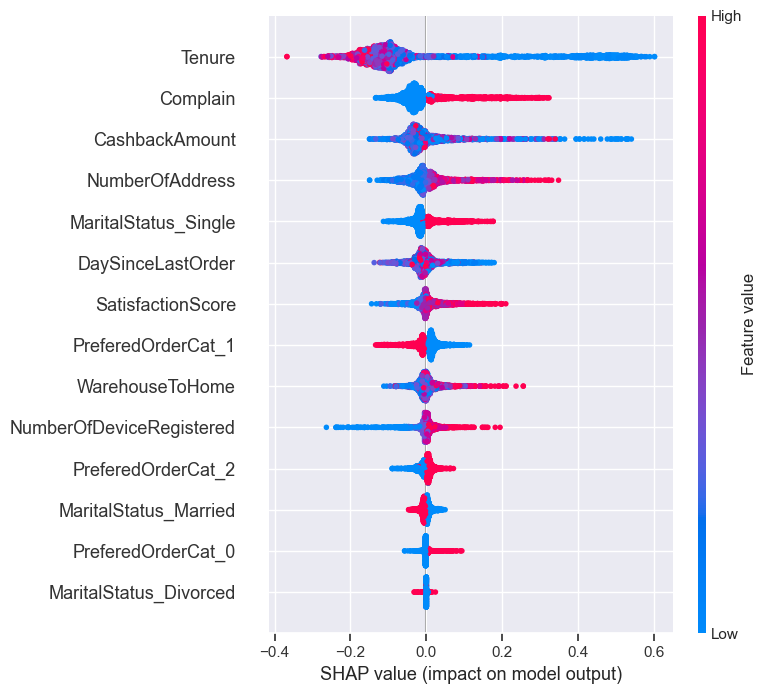

In [86]:
import shap

shap_values = shap.TreeExplainer(lgbm,
                                data = testing1,
                                feature_dependence = "independent",
                                model_output = "probability").shap_values(testing1)
shap.summary_plot(shap_values, testing1, feature_names  = features)

Jika kita amati pada grafik di atas Tenure, Complain, CashbackAmoount, DaySinceLastOrder, dan, WarehouseToHome memiliki warna merah yang dominan dimana berarti nilai proba akan meningkat untuk seorang costumer untuk tidak Churn. Tapi disini ada Complain yang seharunya itu semakin sedikit komplain justru lebih baik atau lebih buruk untuk itu kita akan coba metode lain seperti PCA.

### Conclusion and Recommendation/Improvement

In [87]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       654
           1       0.88      0.81      0.85       135

    accuracy                           0.95       789
   macro avg       0.92      0.90      0.91       789
weighted avg       0.95      0.95      0.95       789



### Conlusion

Berdasarkan hasil classification report dari model yang didapatkan, kita dapat mengambil kesimpulan bila nantinya model ini digunakan untuk memfilter list customer/pelanggan yang akan coba ditawarkan Program loyalitas, maka model ini dapat mengurangi 98% kandidat yang tidak churn untuk tidak di kita approach, dan mode kita ini dapat menangkap 81% pelanggan yang churn dari seluruh kandidat yang tertarik. (semua ini berdasarkan recallnya)

Model kita ini memiliki ketepatan dalam memprediksi customer churn sebesar 96%(precisionya). Artinya, pada setiap model yang memprediksi apakah seorang kandidat itu akan churn, maka kemungkinan tebakanya benar itu sebesar 88% kurang lebih.  Maka masih akan ada kandidat yang sebenarnya tidak akan churn tetapi diprediksi sebagai pelanggan yang akan churn sekita 7% dari keseluruhan pelanggan yang tidak churn(berdasarkan precision).

Bila seandainya: 

* Biaya untuk promosi untuk satu pelanggan baru itu 15$
* Setiap mempertahankan 10% dari pelanggan untuk tidak churn dapat menghasilkan ratusan ribuan dolar
   (berdasarkan sumber dari journal SCOTT A. NESLIN, SUNIL GUPTA, WAGNER KAMAKURA, JUNXIANG LU, and
CHARLOTTE H. MASON*(2006).Defection Detection: Measuring and Understanding the Predictive Accuracy of Customer Churn Models)
* Andaikan jumlah pelanggan sebanyak 789 orang (135 pelanggan akan churn, 654 pelanggan tidak akan churn)

Maka hitungannya kurang lebih akan seperti ini :

Tanpa Model (semua pelanggan diberikan promosi) :

* Total Biaya => 789 x 15 USD = 11.835 USD
* Total pelanggan akan churn yang didapatkan => 135 orang (karena semua kita tawarkan)
* Total pelanggan akan churn yang tidak didapatkan => 0 orang (karena semua kita tawarkan)
* Biaya yang terbuang => 654 x 15 USD = 9.810 USD (karena 654 orang dipromosikan program loyalitas akan sia-sia karena tidak akan churn)
* Jumlah penghematan => 0 USD

Dengan Model (hanya pelanggan yang diprediksi oleh model akan churn yang diberikan promosi program loyalitas) :

* Total Biaya => (81 x 15 USD) + (25 x 15 USD) = 1,215 USD + 375 USD = 1590 USD
* Total pelanggan akan churn yang didapatkan => 110 orang (karena recall 1 atau yang akan churn itu 81%)
* Total pelanggan akan churn yang tidak didapatkan => 25 orang (karena recall 1 atau yang akan churn itu 81%, sisanya 19%)
* Biaya yang terbuang => 15 x 15 USD = 225 USD (2.3% dari 654 atau 15 orang diberikan promosi tapi semulanya memang tidak akan churn)
* Jumlah penghematan => 654 x 15 USD = 1.470 USD (yang dihitung hanya yang memang tidak tertarik saja, kalau yang tertarik tapi tidak ditawarkan itu tidak dihitung disini)

Dengan mengorbankan customer churn sebanyak 21%. Model ini mengkompensasi dengan penghematan biaya sebesar 9.349 USD atau 79% penghematan biaya.

Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model ini, maka perusahaan tersebut akan menghemat biaya yang cukup besar tanpa mengorbankan terlalu banyak customer retention.

### Recommendation

Hal-hal yang bisa dilakukan untuk mengurangi adanya masalah customer churn antara lain sebagai berikut:
- Memberikan promo program loyalitas pada pelanggan yang masih baru agar mereka tidak memiliki potensi untuk churn.
- Pelanggan dengan masa Tenure tertentu diberikan reward untuk yang sudah lama sedangkan yang baru akan diberikan promo khusus.
- Memperbanyak warehouse khususnya diwilayah yang menjadi tempat pembelian terbanyakan sehingga proses pengataran kepelanggan atau customer lebih cepat.
- Menentukan casback yang sesuai agar baik customer atau penjual tidak dirugikan.
- Melakukan pembaruan pada aplikasi mobile dan website e-commerce agar customer merasakan user experience yang berkesan.
- Menangani Komplain pada customer secara edukatif dan ramah untuk mengurangi potensi customer churn.
- Pada pelanggan baru akan diberikan hadiah gratis berupa sticker atau tas agar memberikan kesan tersendiri.
- Diadakanya udian berhadiah atau diberikan kesempatan bagi pelanggan dengan masa Tenur lebih dari 1 tahun untuk mengikuti udian berhadiah seperti lotre.

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:
- Model ini baik untuk melakukan prediksi. Jika menggunakan parameter yang sudah ada contoh pada Kolom MaritalStatus terdapat 3 pilihan dimana Single, Married, dan Divorced jika parameter ini tidak ada perubahan dan pada kolum lainya belum ada tambahan maka model ini cocok untuk melakukan prediksi dengan bagus.
- Model tidak akan baik untuk melakukan prediksi. jika pada kolum atau parameter kolum mengalami perubahan atau penambahan sehingga memerluhkan proses permodelan dari awal lagi.
- Membandingkan model yang ada dimana pada model dilakukan feature engineering untuk menghingkan missing value dan merubah data kategorical dengan model yang lebih simple. Dimana model yang lebih simple itu adalah menggunakan fillna menggunakan modus atau median dan menggunakan pd.get_dummy untuk merubah data kategorical yang ada pada dataset.
- Menambahkan fitur-fitur atau kolum baru yang memberikan kemungkinan minat customer meningkat, seperti customer adalah customer loyal atau tidak, history jumlah pembelian customer, dan Alamat dari customer.
- Mencoba mengunakan teknik oversampling yang beragam selain RUS seperti; RUSE (Random Under Sampling Examples), Borderline-SMOTE, SMOTE (Synthetic Minority Over-sampling Technique), dan ADASYN (Adaptive Synthetic Sampling).

#### Pickle

In [88]:
best_model

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(),
                                                  ['MaritalStatus']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('encoder',
                                                                   BinaryEncoder())]),
                                                  ['PreferedOrderCat'])])),
                ('model',
                 LGBMClassifier(learning_rate=0.125, max_bin=235, max_depth=-2,
                                min_data_in_leaf=25, num_iterations=125,
                                num_leaves=41, random_state=42))])

In [101]:
# Model
import pickle

In [102]:
# save model
filename = "Model_LightGBM.sav"
pickle.dump(best_model, open(filename, 'wb'))

In [103]:
# load model
filename = "Model.sav"
loaded_model = pickle.load(open(filename, 'rb'))

In [104]:
df_predict = pd.DataFrame({
    'Tenure':[20, 30, 1, 4, 7, 8, 11, 19, 25, 17], 
    'WarehouseToHome':[25,29, 11, 7, 6, 15, 13, 12, 22, 21], 
    'NumberOfDeviceRegistered':[2,1,4,5,2,1,1,2,5,5],
    'PreferedOrderCat':['Fashion','Mobile','Mobile','Laptop & Accessory','Fashion','Others','Others','Mobile','Laptop Accesory','Fahsion'], 
    'SatisfactionScore':[2,4,5,4,2,5,3,1,2,4], 
    'MaritalStatus':['Single','Married','Single','Divorced','Divorced','Married','Single','Single','Married','Divorced'],
    'NumberOfAddress':[2,3,3,6,7,5,8,9,10,6], 
    'Complain':[1,0,0,1,1,1,0,0,0,1], 
    'DaySinceLastOrder':[8,5,1,9,10,7,5,7,7,7], 
    'CashbackAmount':[156.4,111.1,154,100,120,133,122,121,190,200]
})

In [105]:
df_predict

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,20,25,2,Fashion,2,Single,2,1,8,156.4
1,30,29,1,Mobile,4,Married,3,0,5,111.1
2,1,11,4,Mobile,5,Single,3,0,1,154.0
3,4,7,5,Laptop & Accessory,4,Divorced,6,1,9,100.0
4,7,6,2,Fashion,2,Divorced,7,1,10,120.0
5,8,15,1,Others,5,Married,5,1,7,133.0
6,11,13,1,Others,3,Single,8,0,5,122.0
7,19,12,2,Mobile,1,Single,9,0,7,121.0
8,25,22,5,Laptop Accesory,2,Married,10,0,7,190.0
9,17,21,5,Fahsion,4,Divorced,6,1,7,200.0


In [106]:
loaded_model.predict(df_predict)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [107]:
loaded_model.predict_proba(df_predict)

array([[9.99435924e-01, 5.64075990e-04],
       [9.99904448e-01, 9.55515595e-05],
       [2.69697892e-01, 7.30302108e-01],
       [9.53643988e-01, 4.63560117e-02],
       [9.36143597e-01, 6.38564026e-02],
       [9.84430742e-01, 1.55692577e-02],
       [9.97333413e-01, 2.66658695e-03],
       [9.15950961e-01, 8.40490390e-02],
       [9.99899066e-01, 1.00933740e-04],
       [9.28681992e-01, 7.13180079e-02]])

In [108]:
df_hasil_prediksi = pd.DataFrame(data=loaded_model.predict_proba(df_predict), columns=['X','Y']).reset_index()

In [109]:
df_hasil_prediksi

,index,X,Y
0,0,0.999436,0.000564
1,1,0.999904,0.000096
2,2,0.269698,0.730302
3,3,0.953644,0.046356
4,4,0.936144,0.063856
5,5,0.984431,0.015569
6,6,0.997333,0.002667
7,7,0.915951,0.084049
8,8,0.999899,0.000101
9,9,0.928682,0.071318


In [110]:
x_axis = np.arange(len(df_hasil_prediksi['index']))

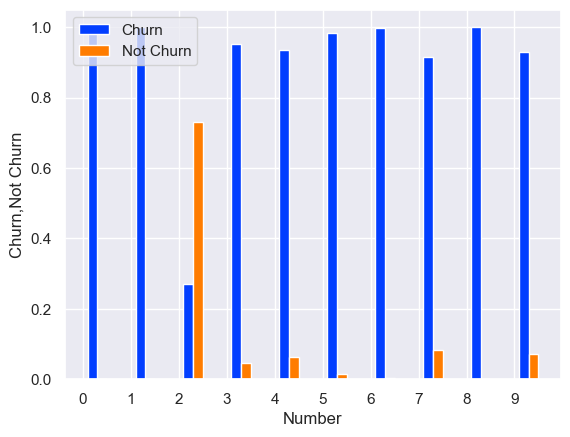

In [111]:
# Multi bar Chart

plt.bar(x_axis +0.20, df_hasil_prediksi['X'], width=0.2, label = 'Churn')
plt.bar(x_axis +0.20*2, df_hasil_prediksi['Y'], width=0.2, label = 'Not Churn')


# Xticks
plt.xlabel('Number')
plt.ylabel('Churn,Not Churn')
plt.xticks(x_axis,df_hasil_prediksi['index'])

# Add legend

plt.legend()

# Display

plt.show()

In [100]:
!pip list

Package                       Version
----------------------------- ---------------
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.12.2
binaryornot                   0.4.4
black                         0.0
bleach                        4.1.0
bokeh     